## Notebook Exploration

Dans un premier temps nous allons charger les bibliothèques comme nous avons l'habitude de le faire et nous chargerons le dataset nettoyé et non plus le dataset de base.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pip
import pandas as pd
import re
import statistics
%matplotlib inline

print('Version de pandas: ', pd.__version__)
print('Version de seaborn: ', sns.__version__)
print('Version de numpy: ', np.__version__)

Version de pandas:  1.2.4
Version de seaborn:  0.11.0
Version de numpy:  1.19.2


In [2]:
# Chargement:

foodData = pd.read_csv("en.openfoodfacts.org.products_9.csv")

# Chargement de fichier pour une comparaison:
foodData_sansOutliers_2 = pd.read_csv("en.openfoodfacts.org.products_SansOutliers_2.csv")
foodData_knn = pd.read_csv("en.openfoodfacts.org.products_knn.csv")


pd.set_option('display.max_columns', 186)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)

# Analyse Univariée

In [3]:
foodData.head(5)

,product_name,categories,labels,countries,additives_n,nutriscore_grade,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,Vitória crackers,NaN,NaN,France,2.017578,NaN,1083.308181,375.000000,1569.000000,7.0,3.08,70.1,15.0,1.6,7.800000,1.400000,0.560000,11.566397
1,Cacao,NaN,NaN,France,2.017578,NaN,1083.308181,274.290963,1142.713543,7.0,1.82,15.1,3.6,1.6,8.581031,1.345601,0.551302,11.566397
2,Filetes de pollo empanado,NaN,NaN,en:es,2.017578,NaN,1083.308181,274.290963,1142.713543,7.0,1.82,15.1,3.6,1.6,8.581031,1.345601,0.551302,11.566397
3,Hamburguesas de ternera 100%,NaN,NaN,en:es,2.017578,NaN,1083.308181,874.900000,3661.000000,15.1,6.10,2.6,1.0,1.6,15.700000,2.100000,0.840000,11.566397
4,moutarde au moût de raisin,"Epicerie, Condiments, Sauces, Moutardes",Delois france,France,0.000000,d,936.000000,274.290963,936.000000,8.2,2.20,29.0,22.0,0.0,5.100000,4.600000,1.840000,18.000000


In [4]:
foodData.shape

(1772411, 18)

In [5]:
newvalues = round(2.0175783150906805, 4)

foodData['additives_n'] = foodData['additives_n'].replace(2.0175783150906805, newvalues)

In [6]:
foodData.head(5)

,product_name,categories,labels,countries,additives_n,nutriscore_grade,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,Vitória crackers,NaN,NaN,France,2.0176,NaN,1083.308181,375.000000,1569.000000,7.0,3.08,70.1,15.0,1.6,7.800000,1.400000,0.560000,11.566397
1,Cacao,NaN,NaN,France,2.0176,NaN,1083.308181,274.290963,1142.713543,7.0,1.82,15.1,3.6,1.6,8.581031,1.345601,0.551302,11.566397
2,Filetes de pollo empanado,NaN,NaN,en:es,2.0176,NaN,1083.308181,274.290963,1142.713543,7.0,1.82,15.1,3.6,1.6,8.581031,1.345601,0.551302,11.566397
3,Hamburguesas de ternera 100%,NaN,NaN,en:es,2.0176,NaN,1083.308181,874.900000,3661.000000,15.1,6.10,2.6,1.0,1.6,15.700000,2.100000,0.840000,11.566397
4,moutarde au moût de raisin,"Epicerie, Condiments, Sauces, Moutardes",Delois france,France,0.0000,d,936.000000,274.290963,936.000000,8.2,2.20,29.0,22.0,0.0,5.100000,4.600000,1.840000,18.000000


Regardons les informations disponibles pour nos variables:

In [7]:
for variable in foodData.columns:
    print("Variable:", variable, "\n", foodData[variable].describe(), '\n')

Variable: product_name 
 count                          1694885
unique                         1113910
top       Aceite de oliva virgen extra
freq                              1256
Name: product_name, dtype: object 

Variable: categories 
 count     848790
unique     92215
top       Snacks
freq       32700
Name: categories, dtype: object 

Variable: labels 
 count      389663
unique      78196
top       Organic
freq        23755
Name: labels, dtype: object 

Variable: countries 
 count     1766912
unique      10295
top        France
freq       429618
Name: countries, dtype: object 

Variable: additives_n 
 count    1.772411e+06
mean     2.017592e+00
std      1.755055e+00
min      0.000000e+00
25%      2.000000e+00
50%      2.017600e+00
75%      2.017600e+00
max      2.000000e+01
Name: additives_n, dtype: float64 

Variable: nutriscore_grade 
 count     660320
unique         5
top            d
freq      205577
Name: nutriscore_grade, dtype: object 

Variable: energy-kj_100g 
 count    1

Regardons aussi la distribution de chacune de ces variables (après nettoyage), ce qui va nous donner une idée de la fréquence 
d'apparition de chaque valeur.

In [8]:
listeVariableNumerique = []
for variable in foodData.columns:
    if foodData[variable].dtypes == 'int64' or foodData[variable].dtypes == 'float64':
        listeVariableNumerique.append(variable)        

In [9]:
listeVariable100g = []
listeEnergy = []
listeAdditives = []
listeNutriscore = []
pattern100g = '100g'
patternEnergy = 'energy'
patternAdditives = 'additives'
patternNutriscore = 'nutri'
for variable in listeVariableNumerique:
    if re.search(pattern100g, variable):
        listeVariable100g.append(variable)
    if re.search(patternEnergy, variable):
        listeEnergy.append(variable)
    if re.search(patternAdditives, variable):
        listeAdditives.append(variable)
    if re.search(patternNutriscore, variable):
        listeNutriscore.append(variable)

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


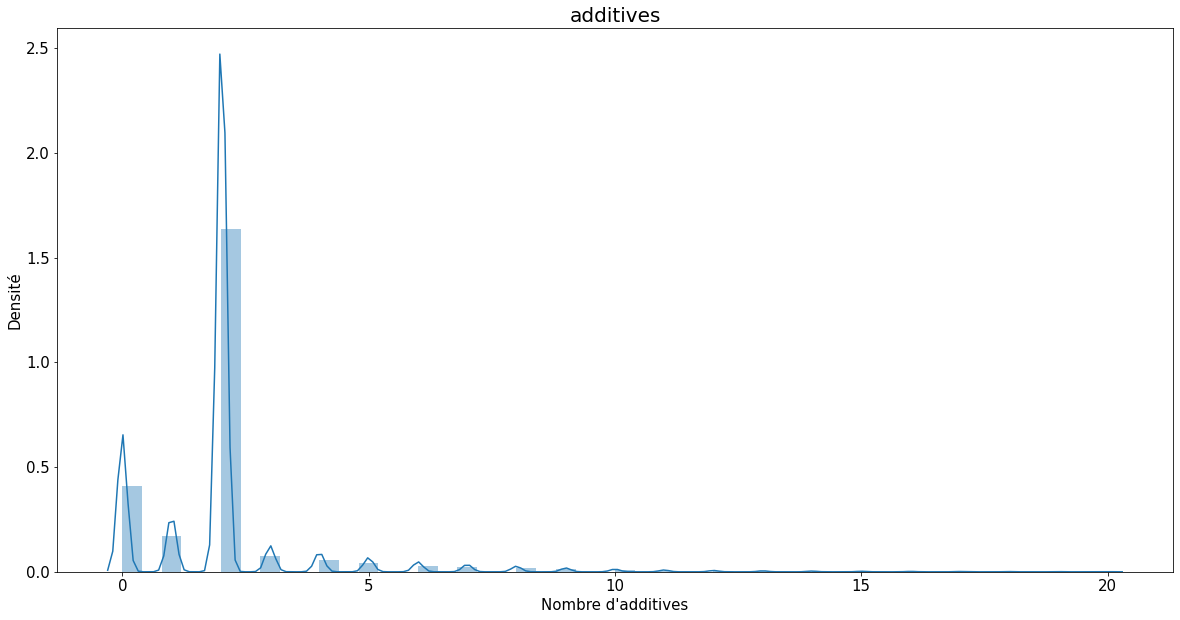

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


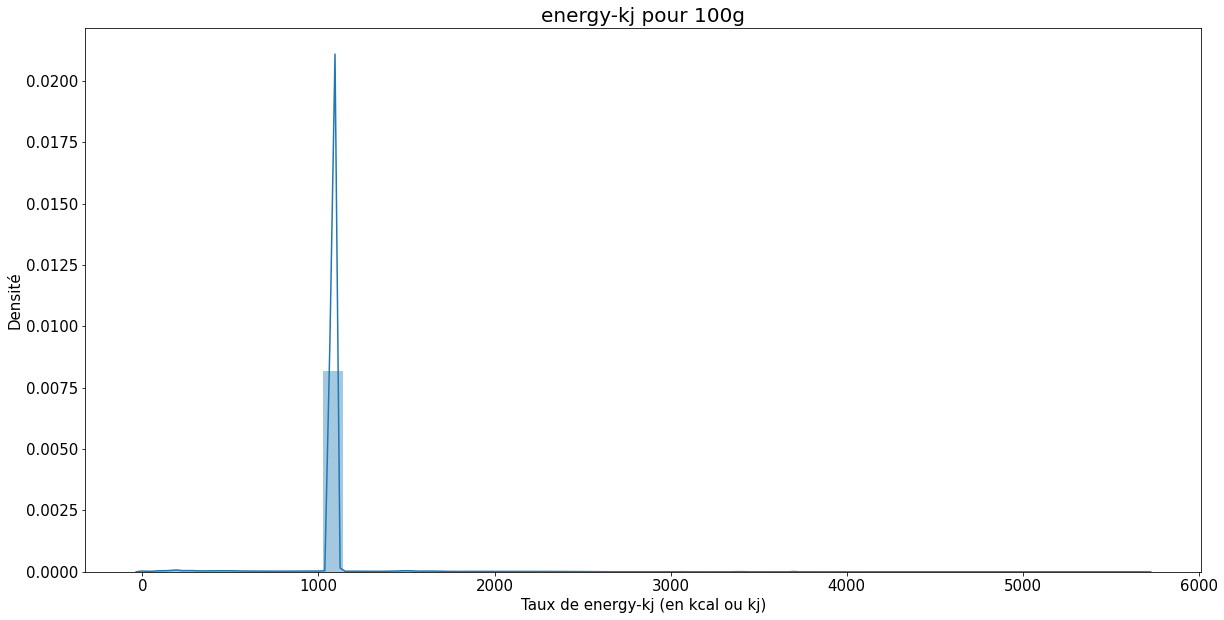

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


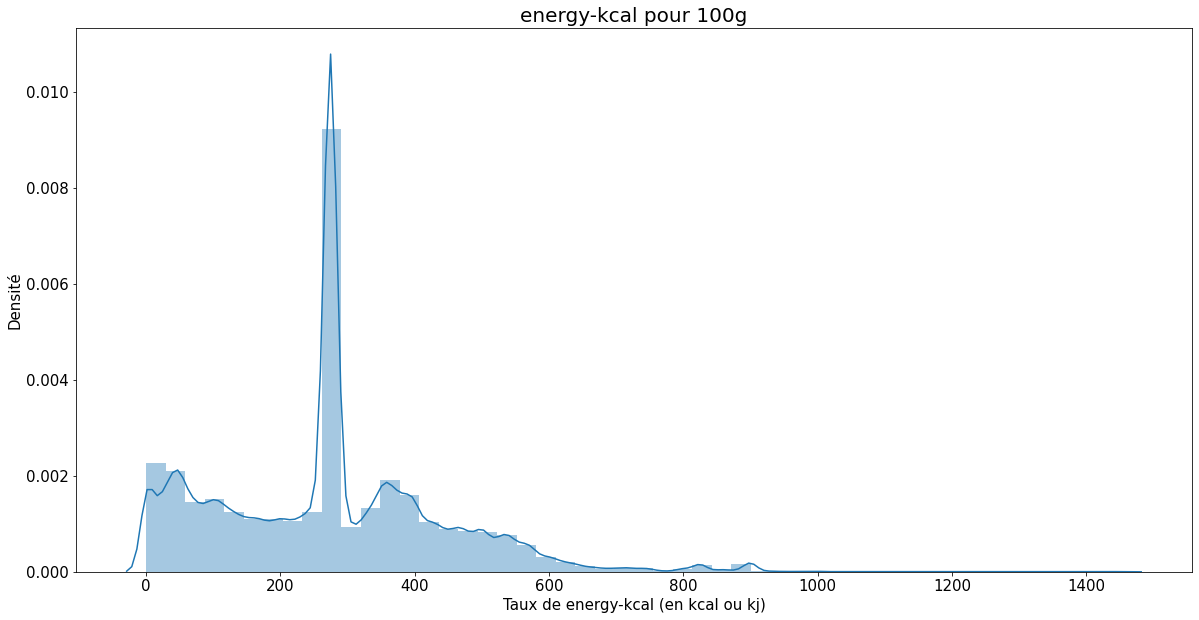

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


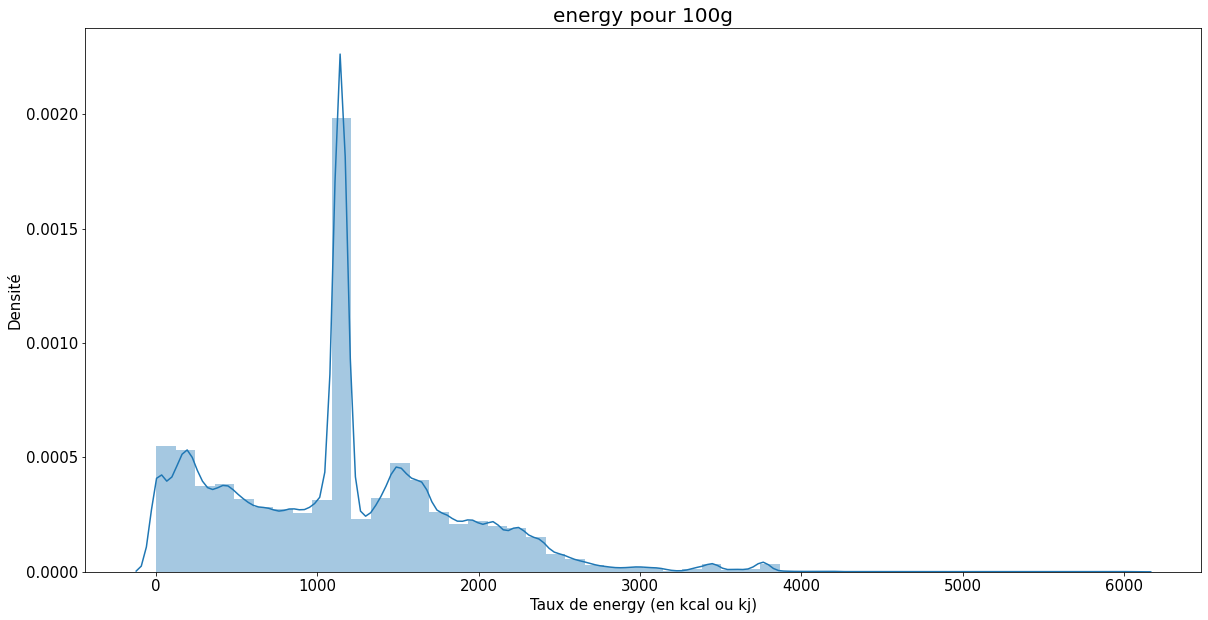

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


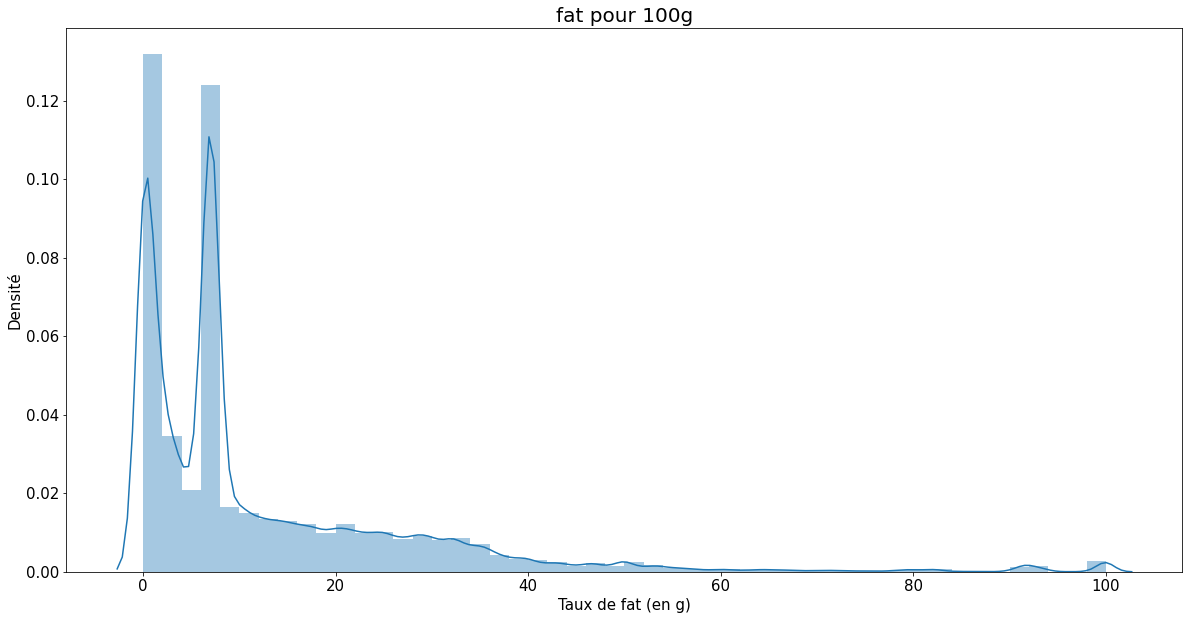

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


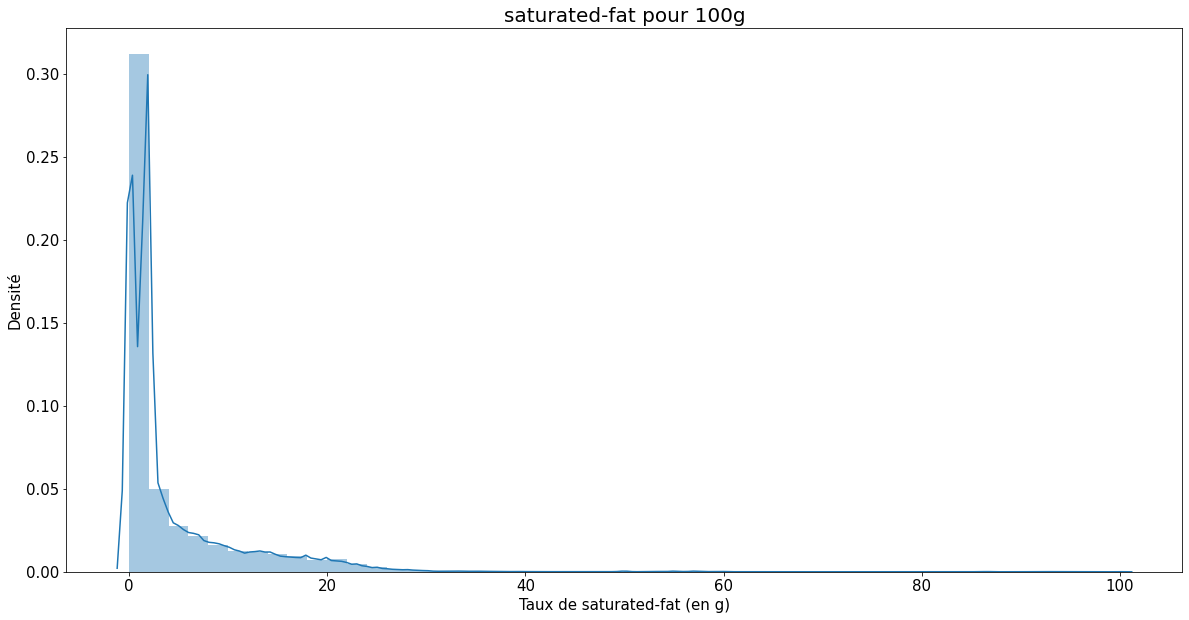

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


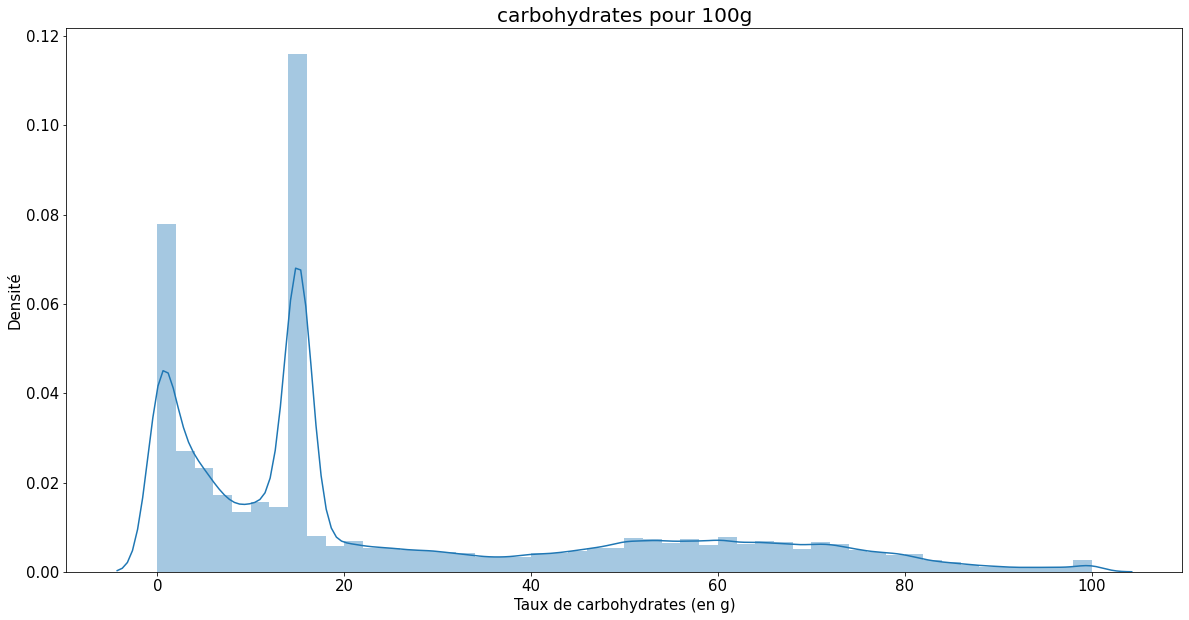

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


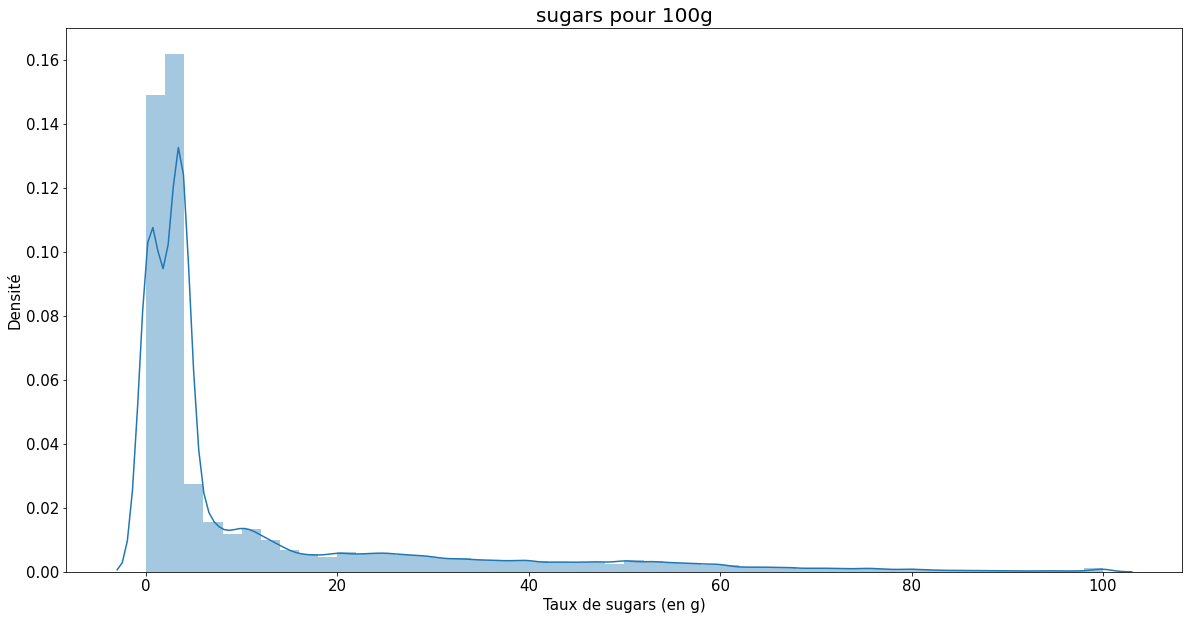

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


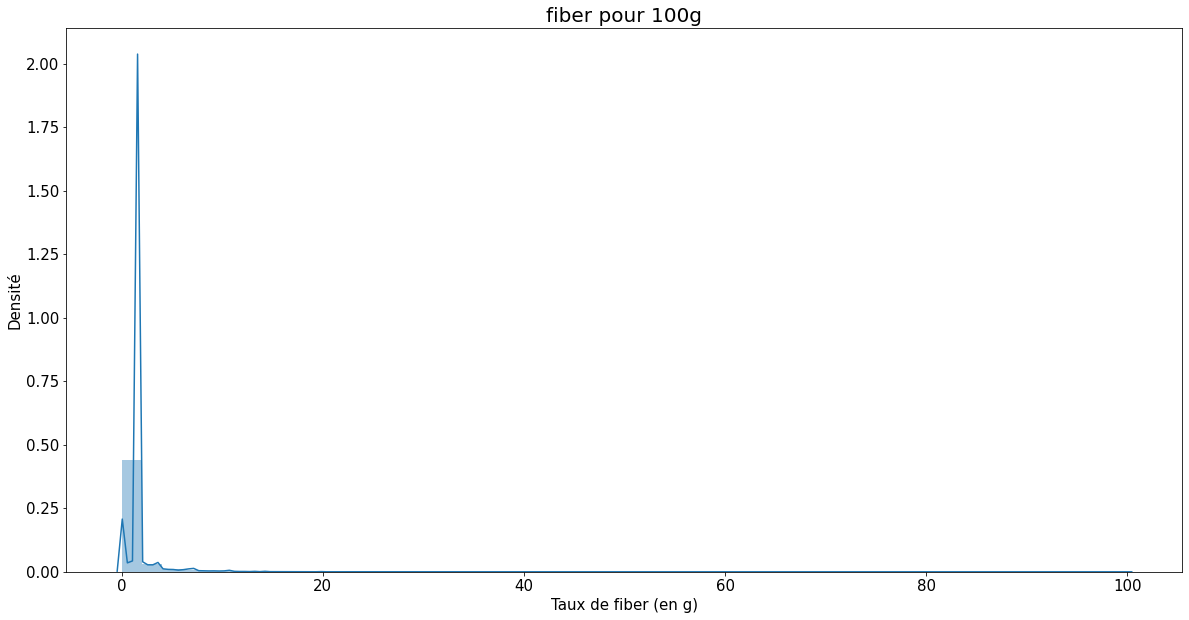

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


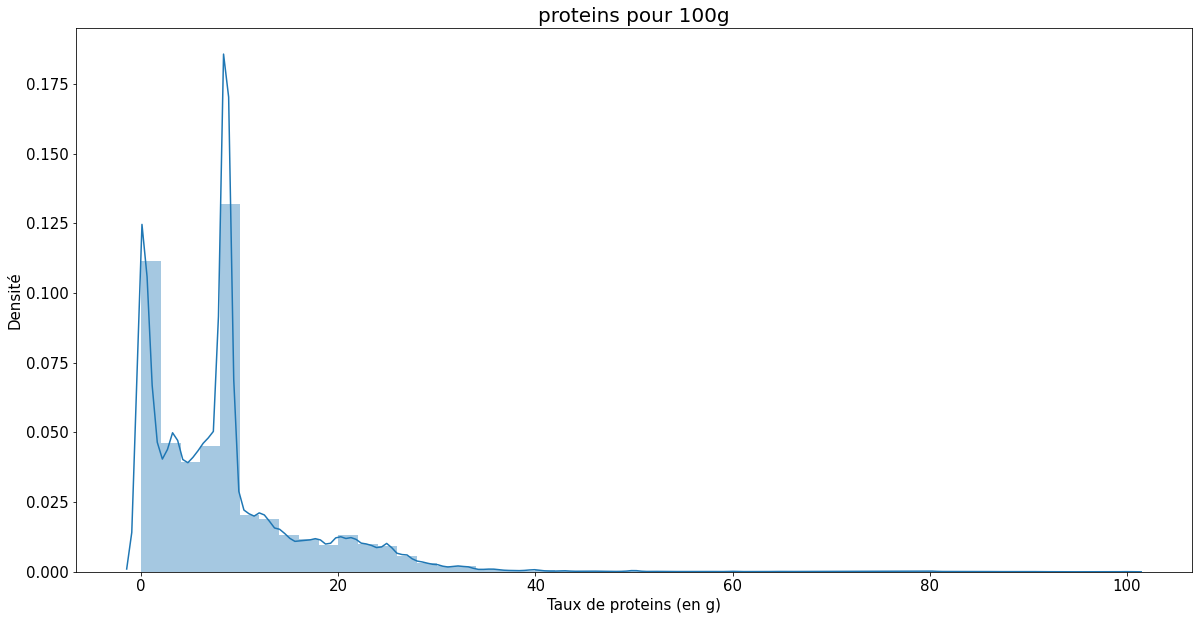

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


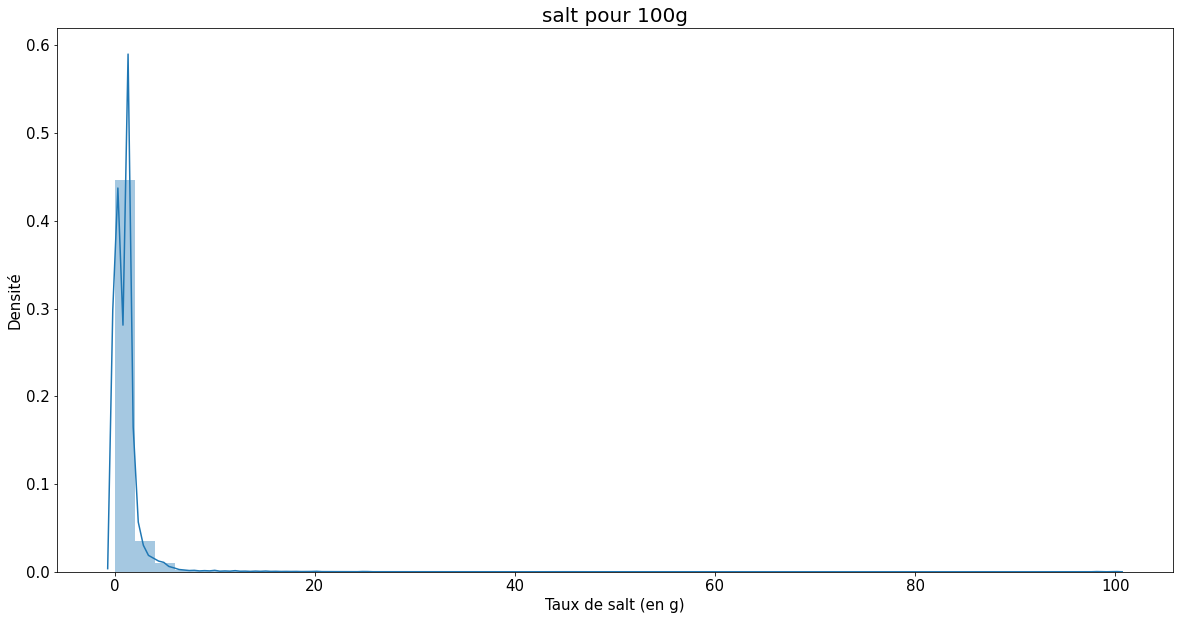

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


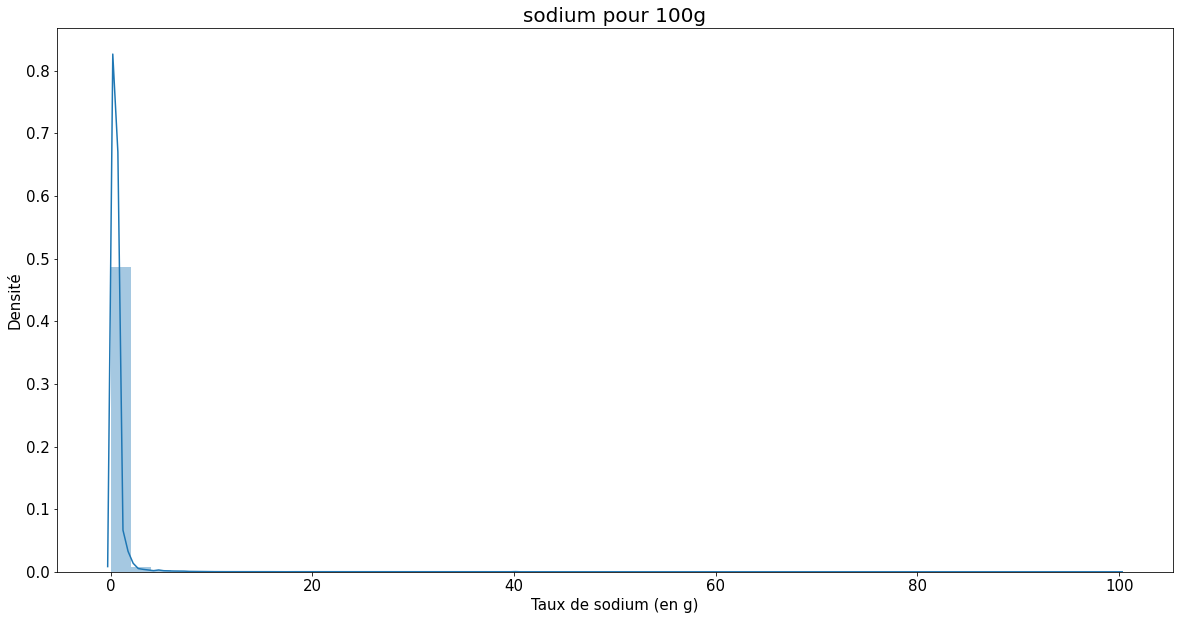

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


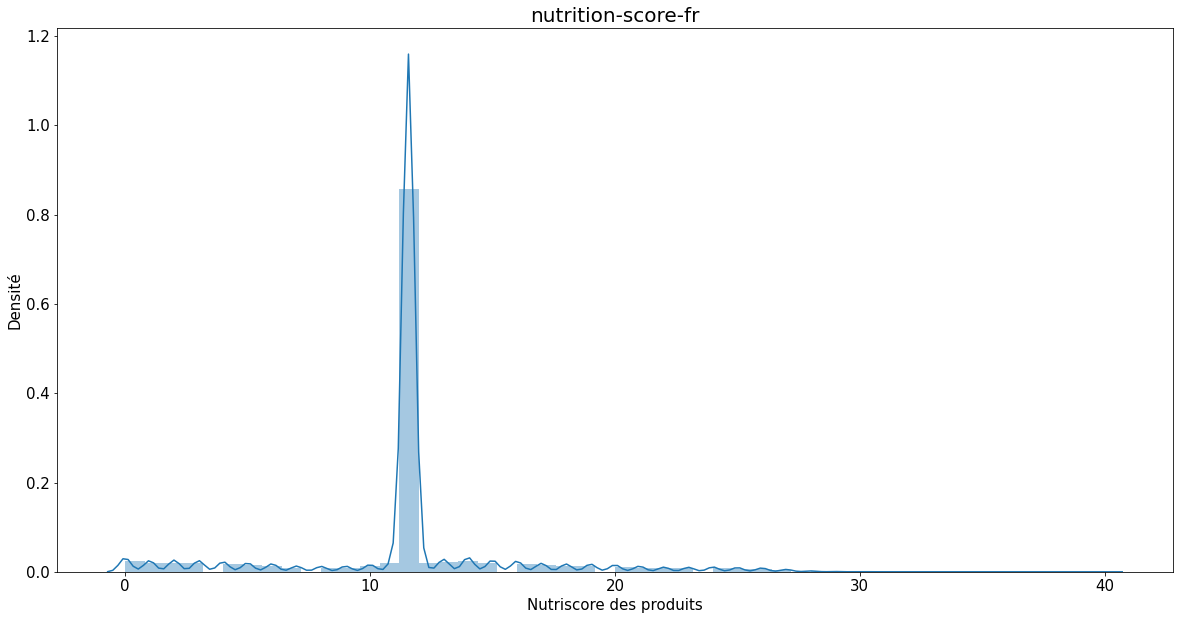

In [11]:
for variable in listeVariableNumerique:
    if variable in listeVariable100g and variable not in listeEnergy and variable not in listeNutriscore:        
        plt.figure(figsize = (20, 10))    
        sns.distplot(foodData[variable])  
        variable = re.split('_', variable)
        plt.title(variable[0] + " pour 100g", fontsize = 20)
        plt.xlabel("Taux de " + variable[0] + " (en g)", fontsize = 15)
        plt.ylabel("Densité", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()  
        
    if variable in listeEnergy:
        plt.figure(figsize = (20, 10))    
        sns.distplot(foodData[variable]) 
        variable = re.split('_', variable)
        plt.title(variable[0] + " pour 100g", fontsize = 20)
        plt.xlabel("Taux de " + variable[0] + " (en kcal ou kj)", fontsize = 15)
        plt.ylabel("Densité", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
        
    if variable in listeAdditives:
        plt.figure(figsize = (20, 10))    
        sns.distplot(foodData[variable]) 
        variable = re.split('_', variable)
        plt.title(variable[0], fontsize = 20)
        plt.xlabel("Nombre d'additives", fontsize = 15)
        plt.ylabel("Densité", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
        
    if variable in listeNutriscore:
        plt.figure(figsize = (20, 10))    
        sns.distplot(foodData[variable])   
        variable = re.split('_', variable)
        plt.title(variable[0], fontsize = 20)
        plt.xlabel("Nutriscore des produits", fontsize = 15)
        plt.ylabel("Densité", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show() 

Les modes s'expliquent par les valeurs de base du dataset (avant nettoyage). Les variables sans énormément de valeurs NaN auront
une distribution multimodale avec des modes assez distincts, alors que les variables ayant beaucoup de valeurs NaN auront une
distribution multimodale mais surtout focalisée sur une valeur en particulier qui sera la valeur de la médiane ou la valeur
de la moyenne, puisqu'on a remplacé chaque valeur NaN par l'une de ces valeurs.

Mais dans l'ensemble pour les variables *_100g, les distributions (si on enlève le mode dû au remplacement des NaN) ont 
des allures plutôt semblables.

Regardons maintenant les boxplots (après nettoyage):

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


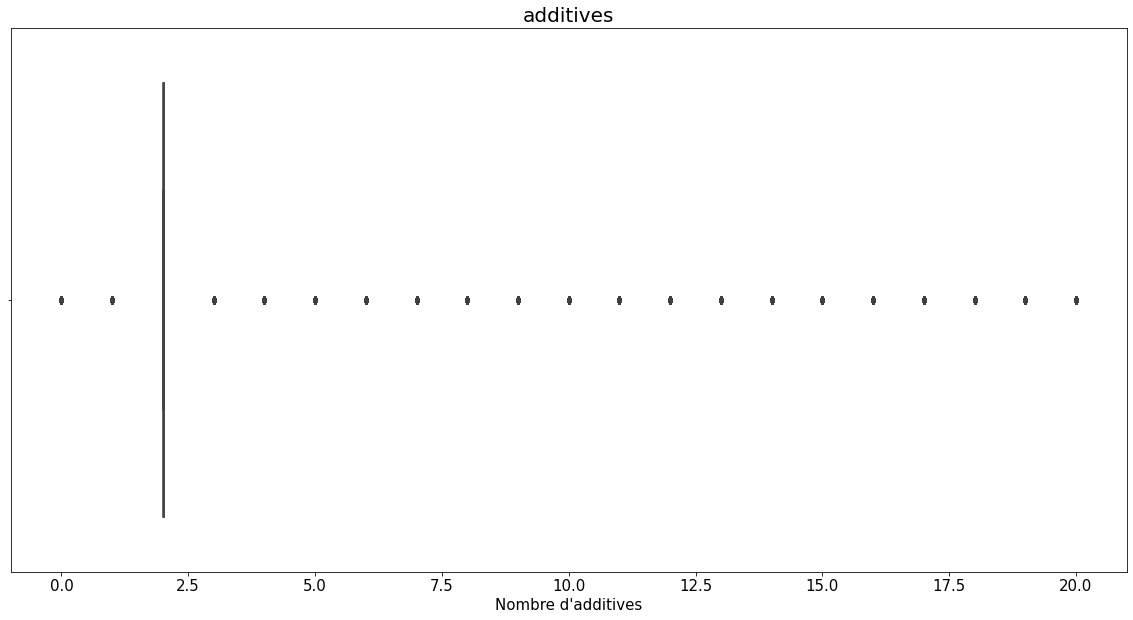

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


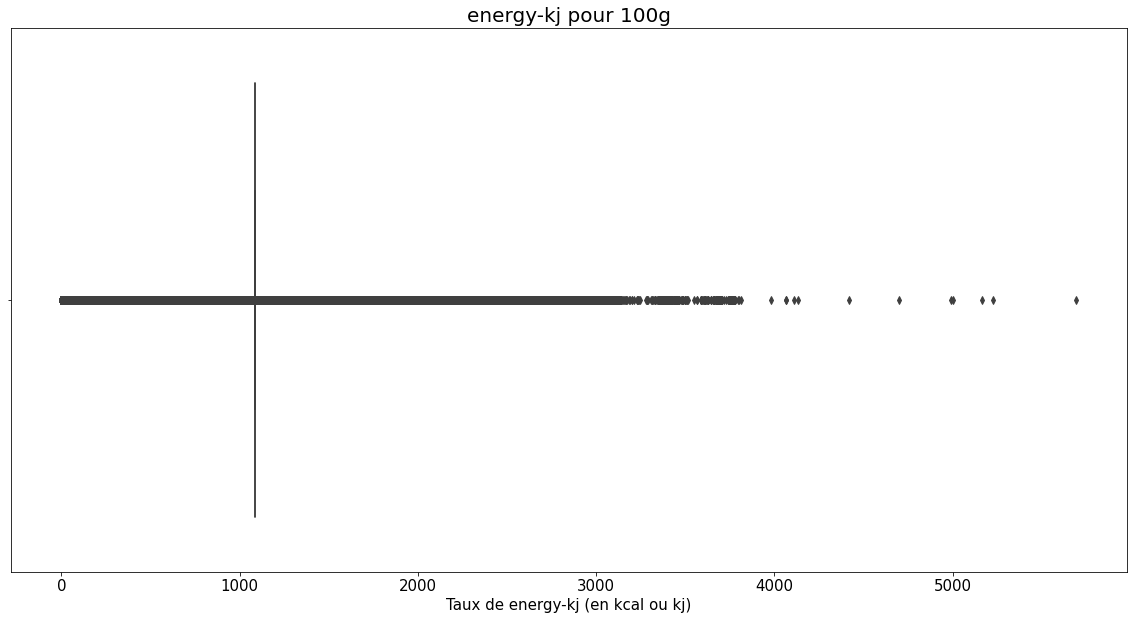

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


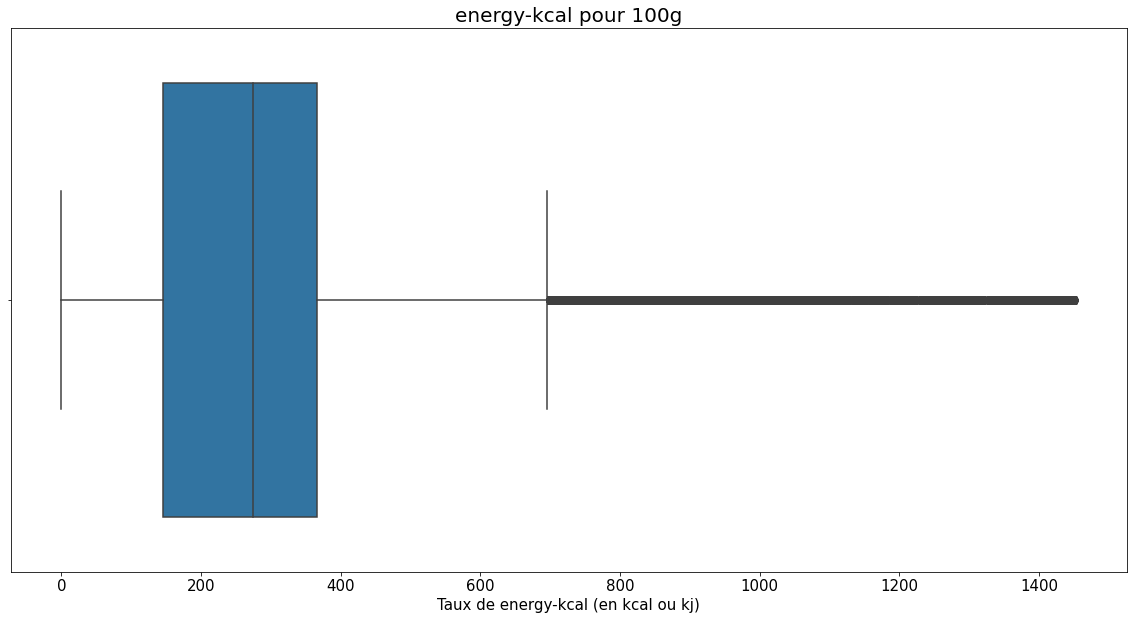

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


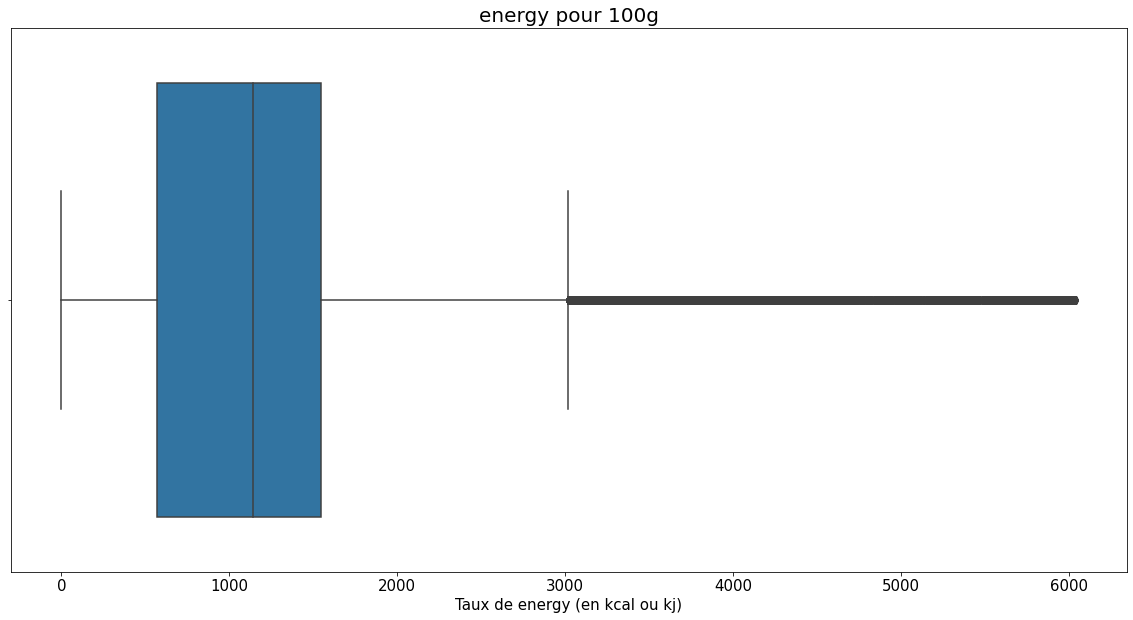

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


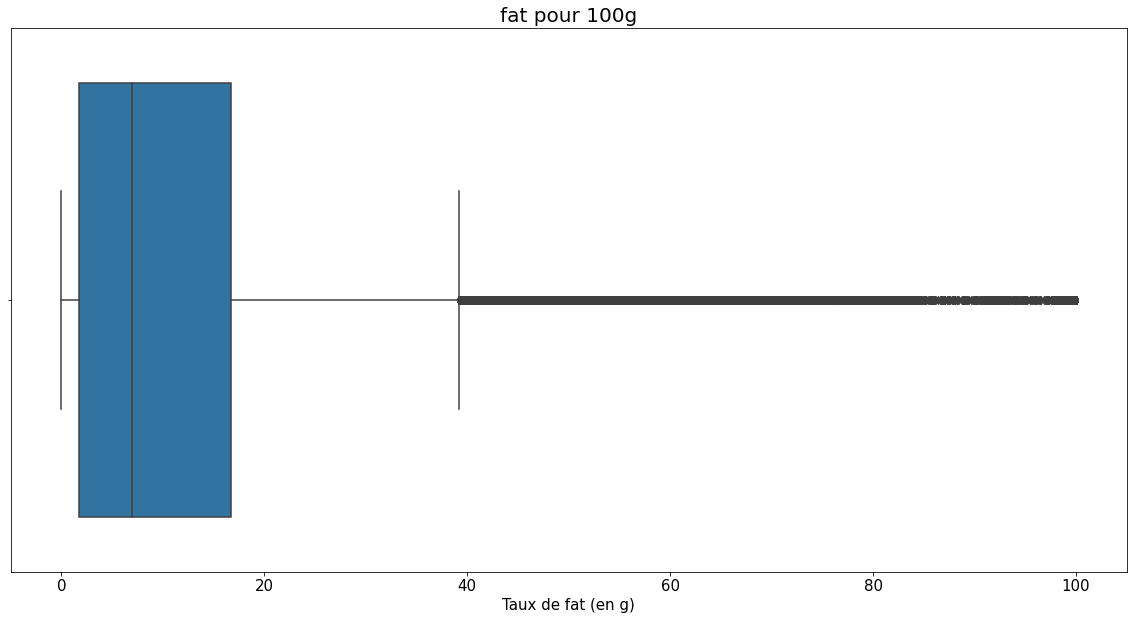

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


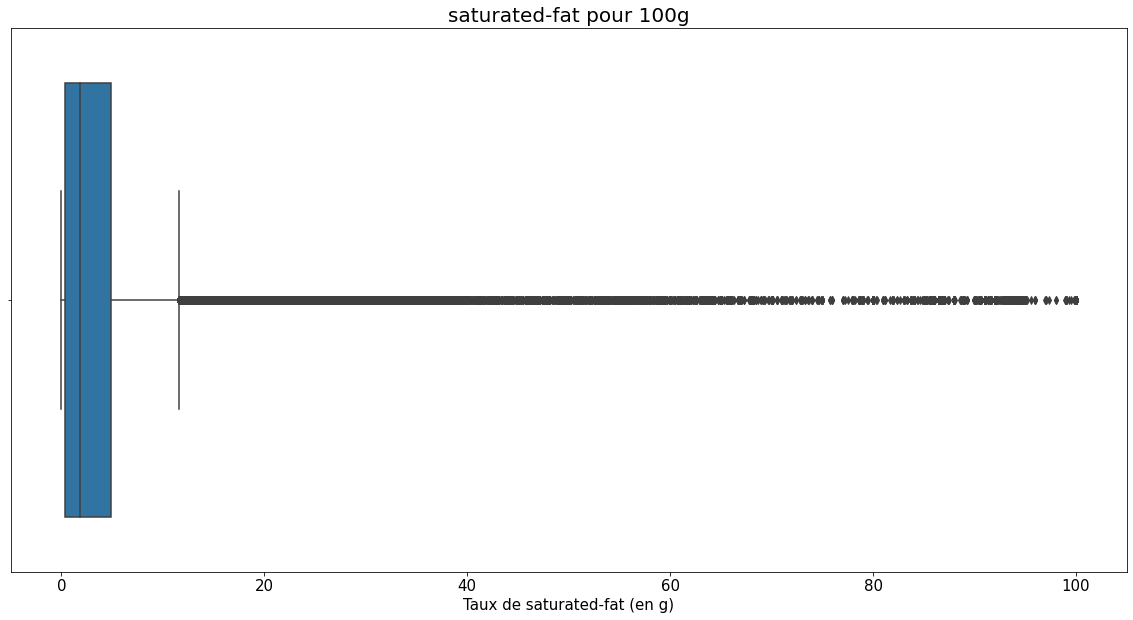

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


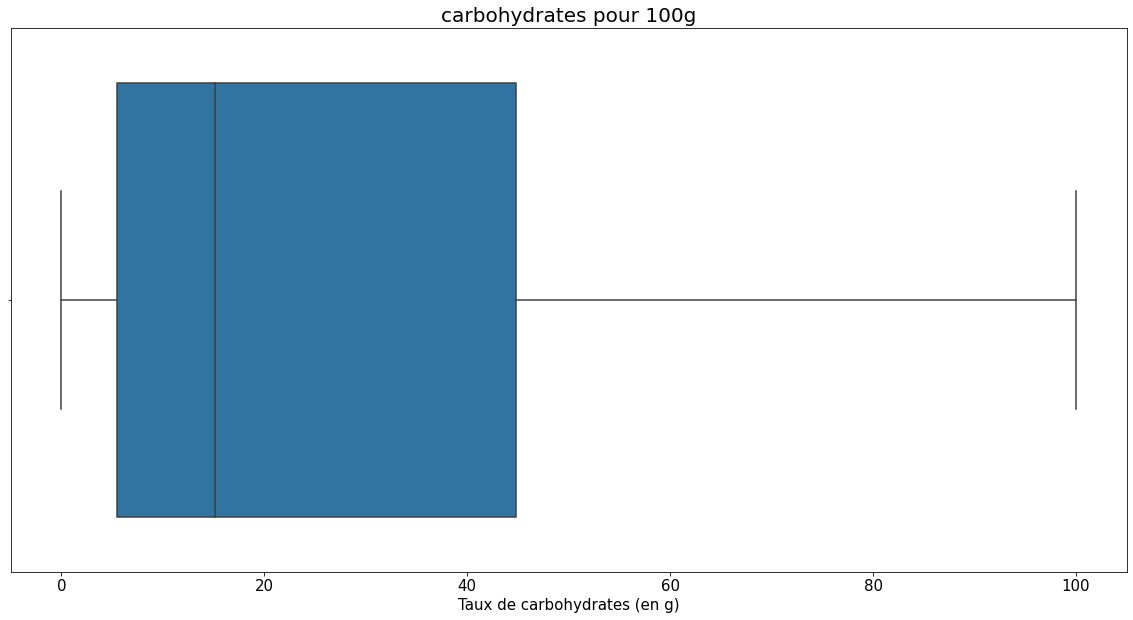

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


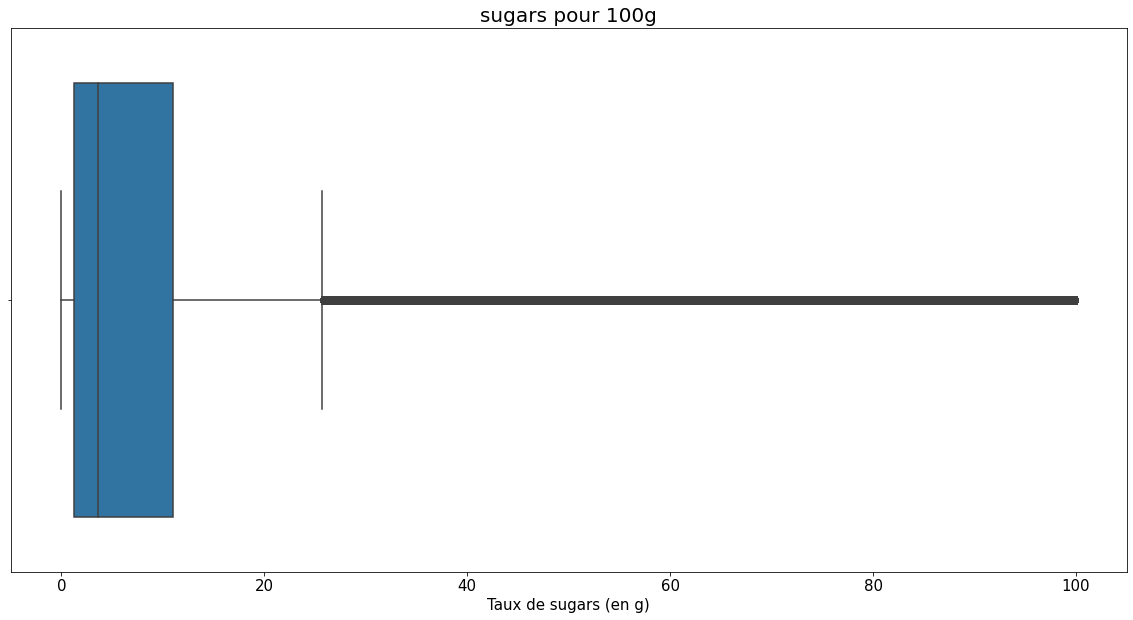

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


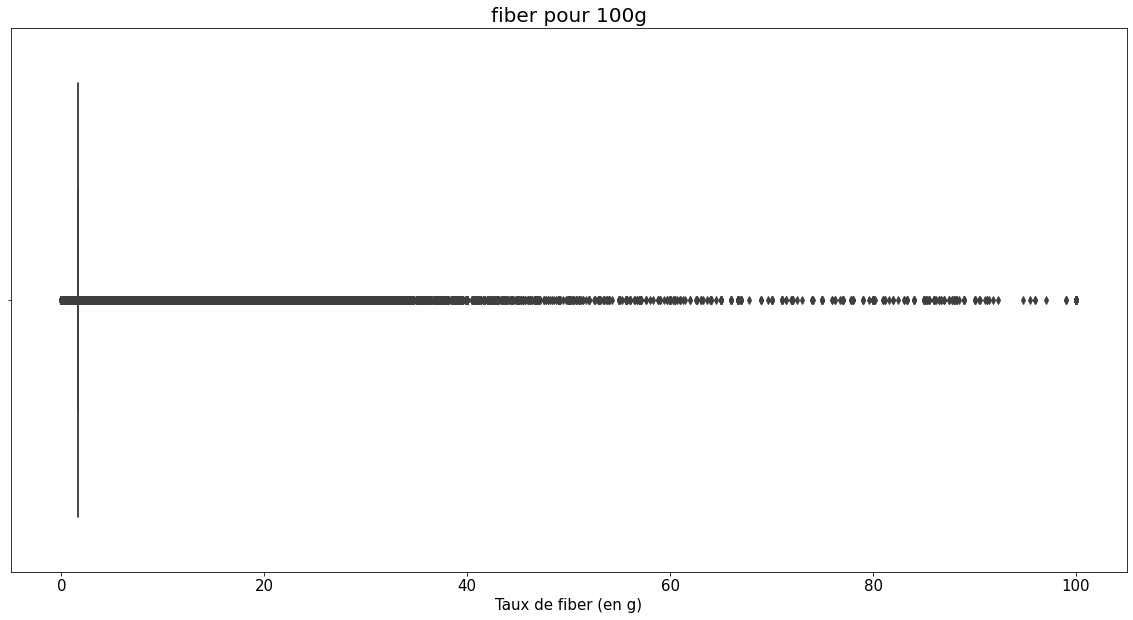

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


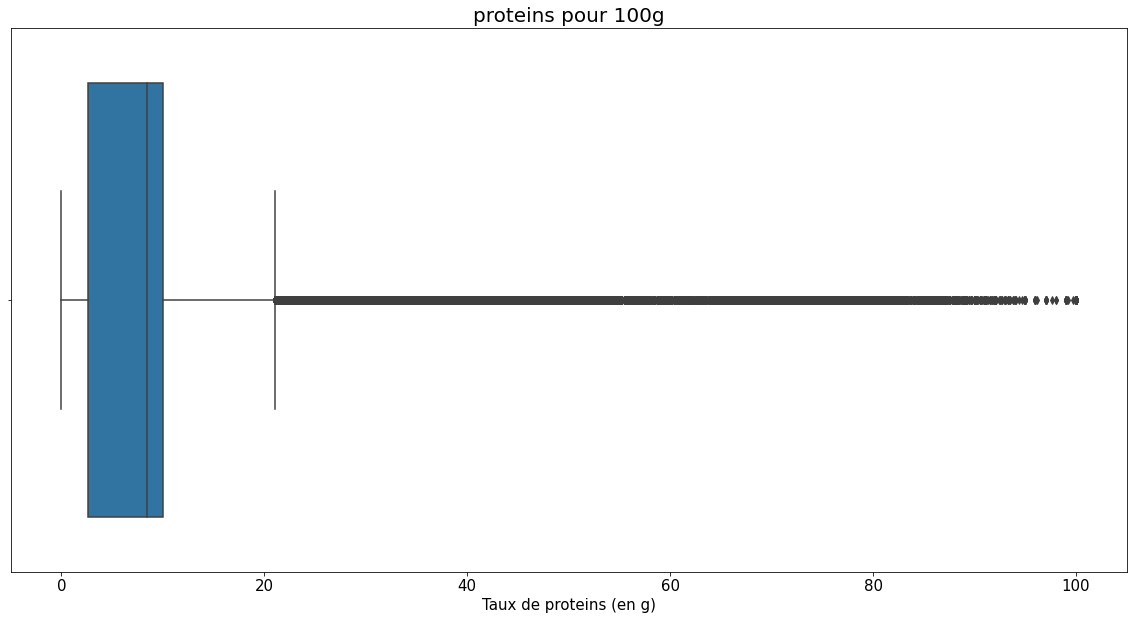

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


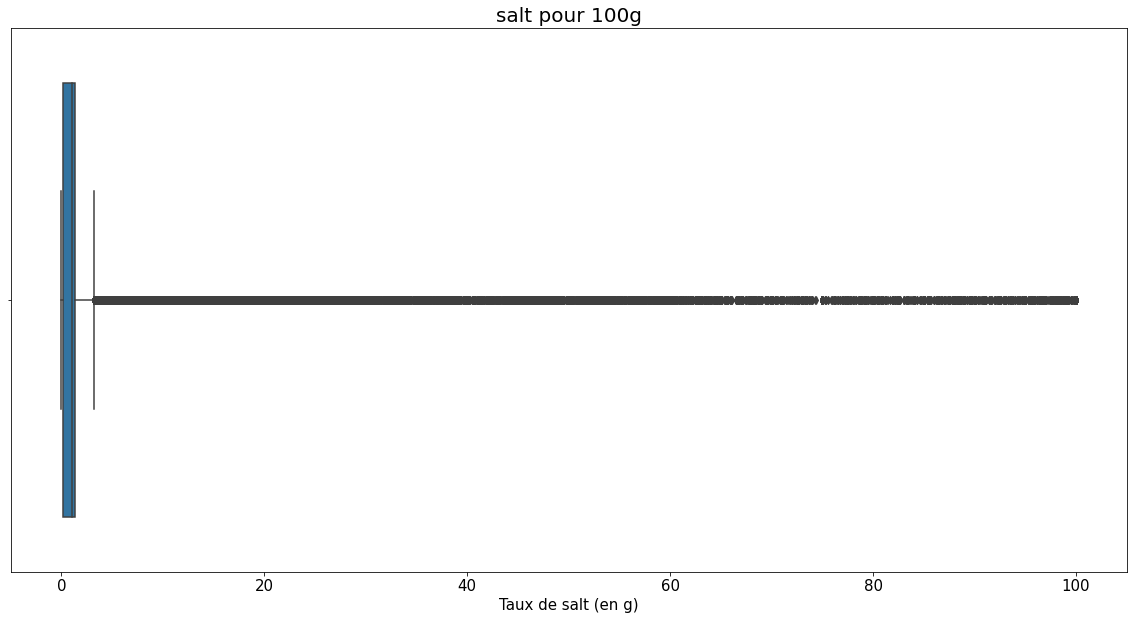

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


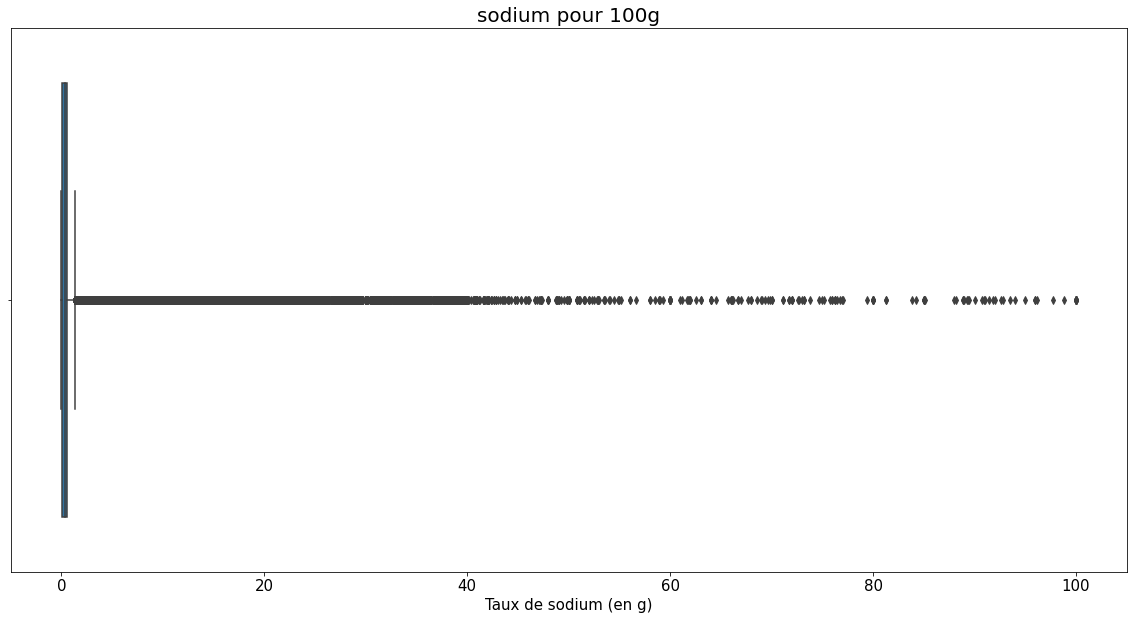

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


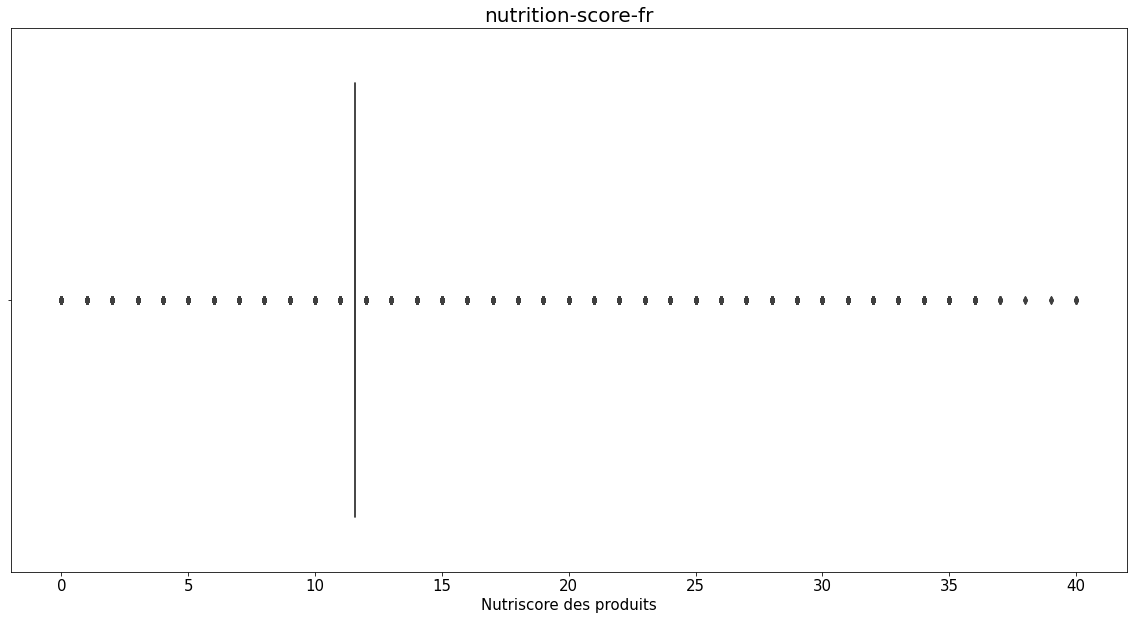

In [13]:
for variable in listeVariableNumerique:
    if variable in listeVariable100g and variable not in listeEnergy and variable not in listeNutriscore:        
        plt.figure(figsize = (20, 10))    
        sns.boxplot(foodData[variable])  
        variable = re.split('_', variable)
        plt.title(variable[0] + " pour 100g", fontsize = 20)
        plt.xlabel("Taux de " + variable[0] + " (en g)", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()  
        
    if variable in listeEnergy:
        plt.figure(figsize = (20, 10))    
        sns.boxplot(foodData[variable]) 
        variable = re.split('_', variable)
        plt.title(variable[0] + " pour 100g", fontsize = 20)
        plt.xlabel("Taux de " + variable[0] + " (en kcal ou kj)", fontsize = 15)        
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
        
    if variable in listeAdditives:
        plt.figure(figsize = (20, 10))    
        sns.boxplot(foodData[variable]) 
        variable = re.split('_', variable)
        plt.title(variable[0], fontsize = 20)
        plt.xlabel("Nombre d'additives", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
        
    if variable in listeNutriscore:
        plt.figure(figsize = (20, 10))    
        sns.boxplot(foodData[variable])   
        variable = re.split('_', variable)
        plt.title(variable[0], fontsize = 20)
        plt.xlabel("Nutriscore des produits", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show() 

Nous pouvons voir qu'il y a des variables avec tellement de valeurs remplacées que la boxplot n'est désignée que par cette 
valeur. Dans l'ensemble les variables ne suivent pas de loi normale.

Regardons maintenant les informations pour les variables qui ne sont pas numériques:

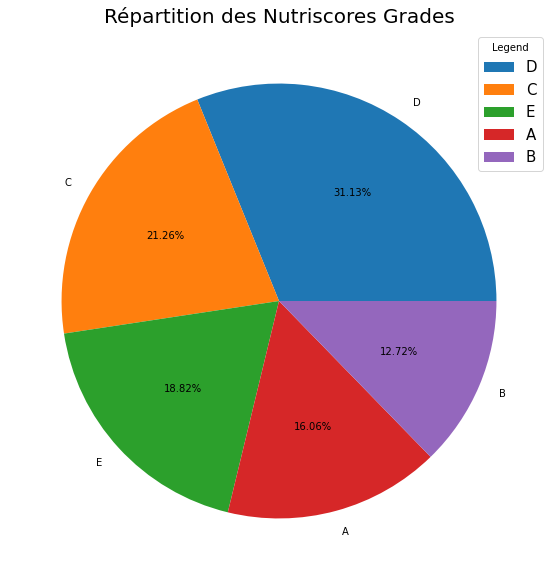

In [14]:
plt.figure(figsize = (10, 10)) 
plt.title('Répartition des Nutriscores Grades', size=20)
wedge, texts, autotxt = plt.pie(foodData['nutriscore_grade'].value_counts().values, 
                                labels = foodData['nutriscore_grade'].value_counts().index.str.upper(), 
                                autopct='%1.2f%%')

plt.legend(wedge, foodData['nutriscore_grade'].value_counts().index.str.upper(),
          title="Legend",
          fontsize = 15)

Nous pouvons voir qu'il y a plus de produits de "mauvaise qualité" que de "bonne qualité" dans le dataset, mais dans la réalité
des choses il faut regarder à quels genre de produit appartient le produit noté.

Nous allons maintenant regarder le nombre d'additifs par produit:

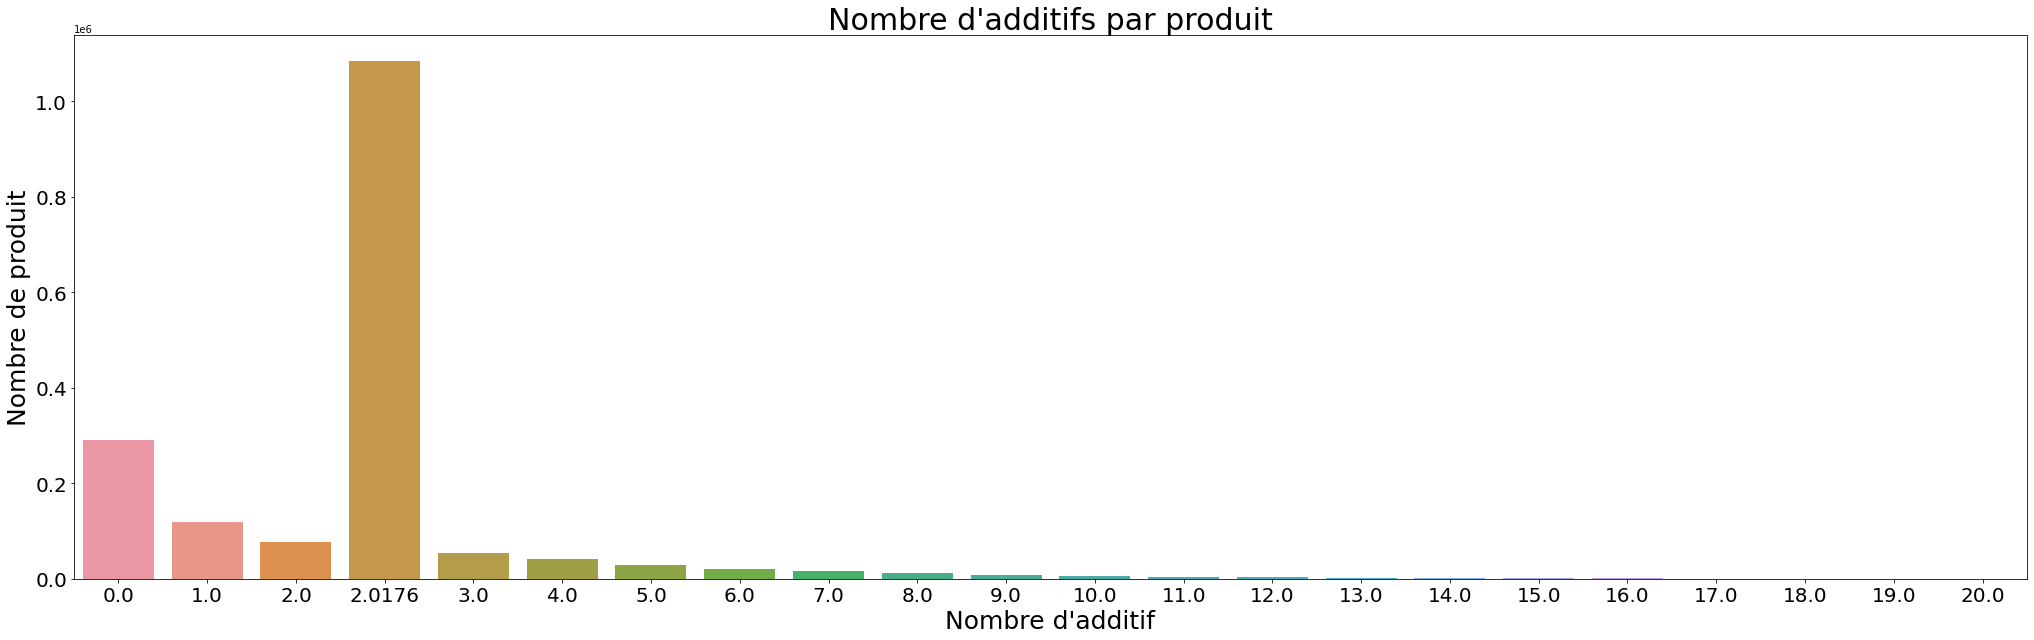

In [16]:
plt.figure(figsize=(35, 10))
plt.title('Nombre d\'additifs par produit', fontsize = 30)
sns.barplot(x = foodData['additives_n'].value_counts().index,
            y = foodData['additives_n'].value_counts().values)
plt.xlabel("Nombre d'additif", fontsize = 25)
plt.ylabel("Nombre de produit", fontsize = 25)
plt.tick_params(axis = 'both', labelsize = 20)
plt.show()

Comme nous pouvons nous y attendre, au vue du nombre de valeurs modifiées, il est logique que la valeur la plus représentait soit celle de la moyenne de la variable. Cependant, nous pouvons remarquer que les produits ont dans l'ensemble un nombre assez réduit d'additives. 
Regardons le nombre d'additif sans outliers et sans NaN.
Mais il faut garder à l'esprit que le graphe mettera de côté de nombreux produits, il ne sera donc pas représentatif de l'ensemble du dataset.

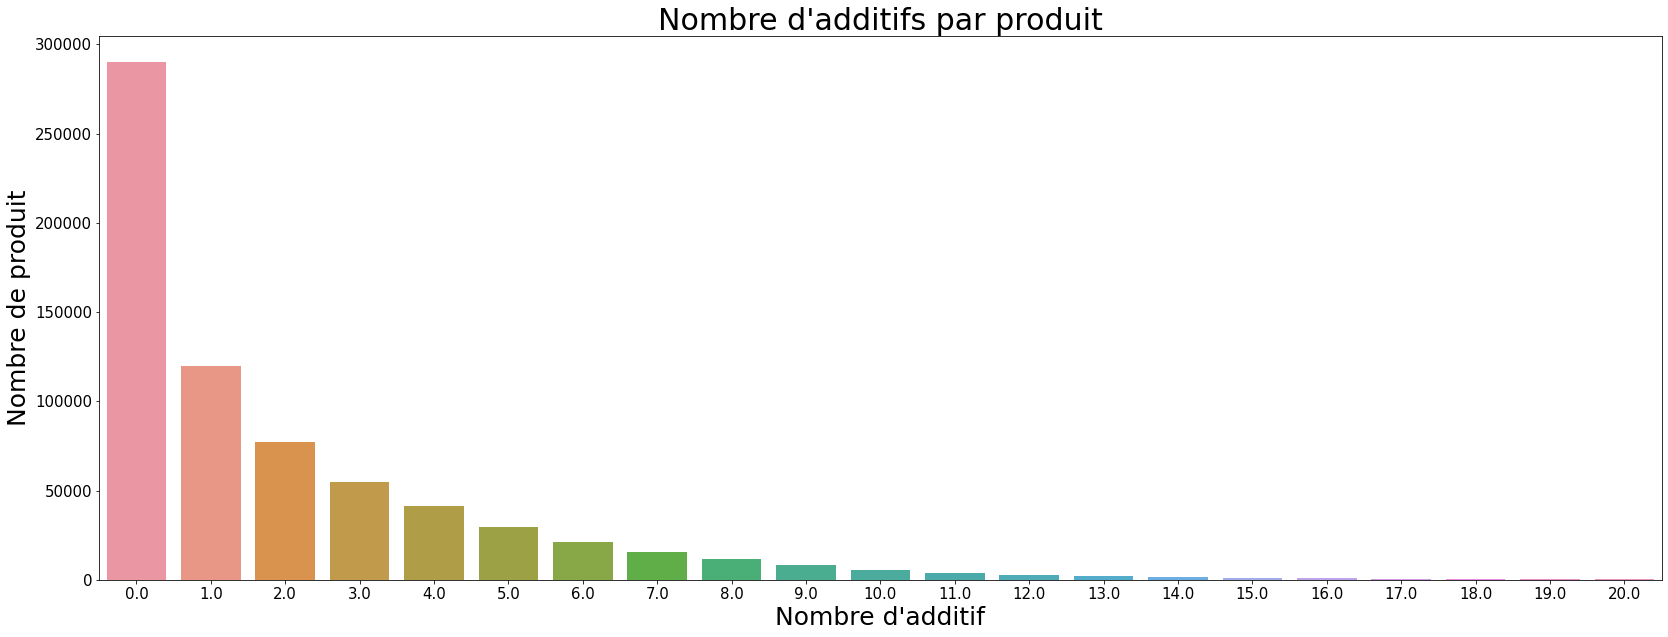

In [17]:
plt.figure(figsize=(28, 10))
plt.title('Nombre d\'additifs par produit', fontsize = 30)
sns.barplot(x = foodData_sansOutliers_2['additives_n'].value_counts().index,
            y = foodData_sansOutliers_2['additives_n'].value_counts().values)
plt.xlabel("Nombre d'additif", fontsize = 25)
plt.ylabel("Nombre de produit", fontsize = 25)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.show()

Comme nous nous y attendions, vu que la moyenne est assez basse, les nombres d'additifs le plus représenté sont ceux assez faibles.

Pour finir l'analyse univariée, nous allons nous attarder sur les catégories, celles qui sont le plus représentées:

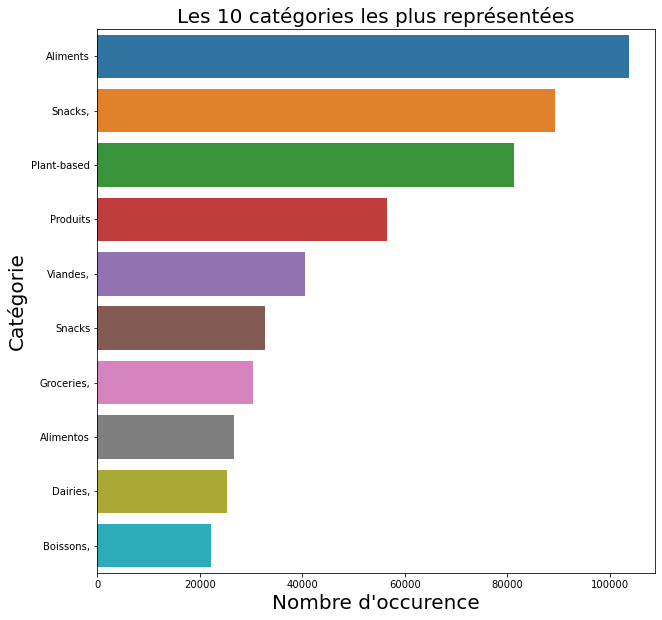

In [18]:
import collections

listeCategories = [str(i).split(' ', 1)[0] for i in foodData['categories'].dropna().tolist()]
categoriesPlusRepresentées = collections.Counter(listeCategories).most_common(10)

categoriesDataset = pd.DataFrame(categoriesPlusRepresentées, columns = ['Catégorie', 'Occurence']).sort_values(by = 'Occurence', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(y = categoriesDataset['Catégorie'], 
            x = categoriesDataset['Occurence'])
plt.title('Les 10 catégories les plus représentées', fontsize=20)
plt.xlabel('Nombre d\'occurence', fontsize = 20)
plt.ylabel('Catégorie', fontsize = 20)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='y', which='major', labelsize=10)
plt.show()

Maintenant que nous avons fait nos analyses univariées et que nous en savons plus sur les variables de manières indépendantes,
nous allons voir comment "elles se comportent" entre elles. 

In [19]:
patternBio = 'Bio'
listeBio = []
listeIndexBio = []
listeLabels = foodData['labels'].tolist() 
listeIndexLabels = foodData['labels'].index.tolist()
listeGrade = foodData['nutriscore_grade'].dropna().tolist()
for i in listeIndexLabels:
    if re.search(patternBio, str(listeLabels[i])):
        listeBio.append(listeLabels[i])
        listeIndexBio.append(i)

In [20]:
listeNutriGrade = []
listeNutriScore = []
for i in listeIndexBio:
    if foodData['nutriscore_grade'][i] == 'a' or foodData['nutriscore_grade'][i] == 'b' or foodData['nutriscore_grade'][i] == 'c' or foodData['nutriscore_grade'][i] == 'd' or foodData['nutriscore_grade'][i] == 'e':
        listeNutriGrade.append(foodData['nutriscore_grade'][i])
    
    listeNutriScore.append(foodData['nutrition-score-fr_100g'][i])

In [21]:
for i in set(listeNutriScore):
    print("Il y a ", listeNutriScore.count(i) ,"produits ayant un score ", i, "/ (Proportion:", listeNutriScore.count(i)/len(listeNutriScore)*100,"%)")

Il y a  1827 produits ayant un score  0.0 / (Proportion: 4.018475750577368 %)
Il y a  1447 produits ayant un score  1.0 / (Proportion: 3.1826679863631364 %)
Il y a  1344 produits ayant un score  2.0 / (Proportion: 2.956120092378753 %)
Il y a  1146 produits ayant un score  3.0 / (Proportion: 2.520620257340812 %)
Il y a  1086 produits ayant un score  4.0 / (Proportion: 2.3886506103596172 %)
Il y a  913 produits ayant un score  5.0 / (Proportion: 2.008138128230507 %)
Il y a  937 produits ayant un score  6.0 / (Proportion: 2.060925987022985 %)
Il y a  783 produits ayant un score  7.0 / (Proportion: 1.722203893104586 %)
Il y a  627 produits ayant un score  8.0 / (Proportion: 1.3790828109534807 %)
Il y a  595 produits ayant un score  9.0 / (Proportion: 1.308698999230177 %)
Il y a  799 produits ayant un score  10.0 / (Proportion: 1.7573957989662377 %)
Il y a  1141 produits ayant un score  11.0 / (Proportion: 2.5096227867590453 %)
Il y a  24447 produits ayant un score  11.566396718117169 / (Pr

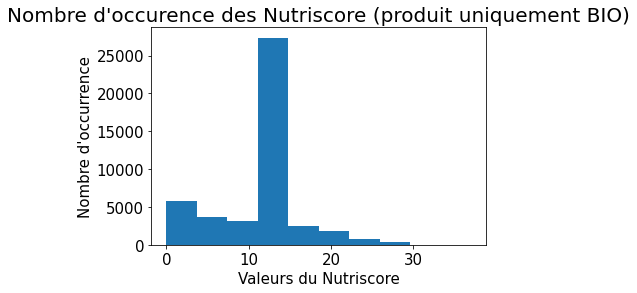

In [22]:
plt.hist(listeNutriScore)
plt.title("Nombre d'occurence des Nutriscore (produit uniquement BIO)", fontsize = 20)
plt.xlabel("Valeurs du Nutriscore", fontsize = 15)
plt.ylabel("Nombre d'occurrence", fontsize = 15)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.show()

A partir du nutriscore élaboré initialement par une équipe d’Oxford pour la Food Standard Agency (FSA) du Royaume-Uni, nous pouvons voir que les produits BIO ne sont pas forcémént meilleur nutritionnellement parlant (Score de D pour un produit ayant un score supérieur à 11).
(https://quoidansmonassiette.fr/comment-est-calcule-le-nutri-score-logo-nutritionnel/)

##### Légère mise en garde

Il faut cependant être vigilant à ces résultats, il faut garder à l'esprit que beaucoup de valeurs aberrantes et manquantes ont été remplacé par la moyenne de la variable, ce qui veut dire que pour 24447 produits nous avons un score qui peut être correct (sans être exact) comme un score qui peut ne rien a voir en commun avec le vrai score qu'il pourrait avoir autrement.


##### Information du score (pour aliments solides):

Min à -1: Nutriscore A

0 à 2: Nutriscore B

3 à 10: Nutriscore C

11 à 18: Nutriscore D

19 à max: Nutriscore E

##### Information du score (pour boissons):

Eau: Nutriscore A

Min à 1: Nutriscore B

2 à 5: Nutriscore C

6 à 9: Nutriscore D

10 à max: Nutriscore E

In [23]:
listeBioI = []
listeIndexBioI = []
for i in listeIndexLabels:
    if re.search(patternBio, str(listeLabels[i])) == None:
        listeBioI.append(listeLabels[i])
        listeIndexBioI.append(i)

In [24]:
listeNutriGradeI = []
listeNutriScoreI = []
for i in listeIndexBioI:
    if foodData['nutriscore_grade'][i] == 'a' or foodData['nutriscore_grade'][i] == 'b' or foodData['nutriscore_grade'][i] == 'c' or foodData['nutriscore_grade'][i] == 'd' or foodData['nutriscore_grade'][i] == 'e':
        listeNutriGradeI.append(foodData['nutriscore_grade'][i])
    
    listeNutriScoreI.append(foodData['nutrition-score-fr_100g'][i])

In [25]:
for i in set(listeNutriScoreI):
    print("Il y a ", listeNutriScoreI.count(i) ,"produits ayant un score ", i, "/ (Proportion:", listeNutriScoreI.count(i)/len(listeNutriScoreI)*100,"%)")

Il y a  31170 produits ayant un score  0.0 / (Proportion: 1.8049203623043222 %)
Il y a  25074 produits ayant un score  1.0 / (Proportion: 1.4519272750856136 %)
Il y a  26357 produits ayant un score  2.0 / (Proportion: 1.5262202755615983 %)
Il y a  25365 produits ayant un score  3.0 / (Proportion: 1.4687778309223334 %)
Il y a  22747 produits ayant un score  4.0 / (Proportion: 1.3171807340820152 %)
Il y a  20143 produits ayant un score  5.0 / (Proportion: 1.1663943169039448 %)
Il y a  18009 produits ayant un score  6.0 / (Proportion: 1.0428235741013325 %)
Il y a  12836 produits ayant un score  7.0 / (Proportion: 0.743277438900811 %)
Il y a  12167 produits ayant un score  8.0 / (Proportion: 0.7045385321834036 %)
Il y a  12792 produits ayant un score  9.0 / (Proportion: 0.7407295885337468 %)
Il y a  16199 produits ayant un score  10.0 / (Proportion: 0.9380142749107383 %)
Il y a  1192673 produits ayant un score  11.566396718117169 / (Proportion: 69.06255320085283 %)
Il y a  28167 produits a

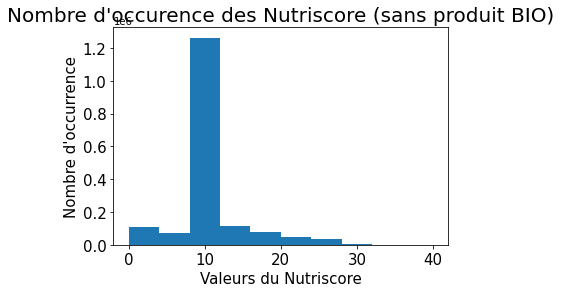

In [26]:
plt.hist(listeNutriScoreI)
plt.title("Nombre d'occurence des Nutriscore (sans produit BIO)", fontsize = 20)
plt.xlabel("Valeurs du Nutriscore", fontsize = 15)
plt.ylabel("Nombre d'occurrence", fontsize = 15)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.show()

Cependant nous pouvons remarquer que proportionnellement au nombre de produit, le produits BIO ont en général un meilleur nutriscore (sans compter les valeurs remplacées).

In [27]:
for i in set(listeNutriGrade):
    print("Il y a ", listeNutriGrade.count(i) ,"produits ayant un grade ", i, "/ (Proportion:", listeNutriGrade.count(i)/len(listeNutriGrade)*100,"%)")

Il y a  6350 produits ayant un grade  c / (Proportion: 22.323782738618387 %)
Il y a  7208 produits ayant un grade  a / (Proportion: 25.34013007558446 %)
Il y a  3737 produits ayant un grade  e / (Proportion: 13.13763403058534 %)
Il y a  6480 produits ayant un grade  d / (Proportion: 22.780805062401125 %)
Il y a  4670 produits ayant un grade  b / (Proportion: 16.417648092810687 %)


In [28]:
listeNutriGrade.sort()
listeNutriGrade = [String.upper() for String in listeNutriGrade]

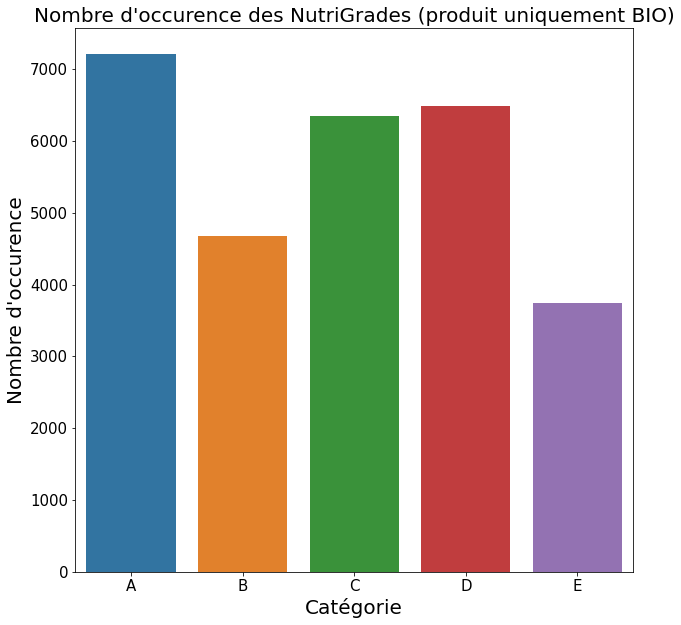

In [29]:
GradePlusRepresentées = collections.Counter(listeNutriGrade).most_common(len(listeNutriGrade))

NutrigradeDataset = pd.DataFrame(GradePlusRepresentées, columns = ['Grade', 'Occurence']).sort_values(by = 'Grade', ascending = True)

plt.figure(figsize=(10, 10))
sns.barplot(x = NutrigradeDataset['Grade'], 
            y = NutrigradeDataset['Occurence'])
plt.title("Nombre d'occurence des NutriGrades (produit uniquement BIO)", fontsize=20)
plt.ylabel('Nombre d\'occurence', fontsize = 20)
plt.xlabel('Catégorie', fontsize = 20)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.show()

In [30]:
for i in set(listeNutriGradeI):
    print("Il y a ", listeNutriGradeI.count(i) ,"produits ayant un grade ", i, "/ (Proportion:", listeNutriGradeI.count(i)/len(listeNutriGradeI)*100,"%)")

Il y a  98858 produits ayant un grade  a / (Proportion: 15.645182987141443 %)
Il y a  134047 produits ayant un grade  c / (Proportion: 21.214164193867457 %)
Il y a  120548 produits ayant un grade  e / (Proportion: 19.07782393669634 %)
Il y a  199097 produits ayant un grade  d / (Proportion: 31.508921859545 %)
Il y a  79325 produits ayant un grade  b / (Proportion: 12.553907022749753 %)


In [31]:
listeNutriGradeI.sort()
listeNutriGradeI = [String.upper() for String in listeNutriGradeI]

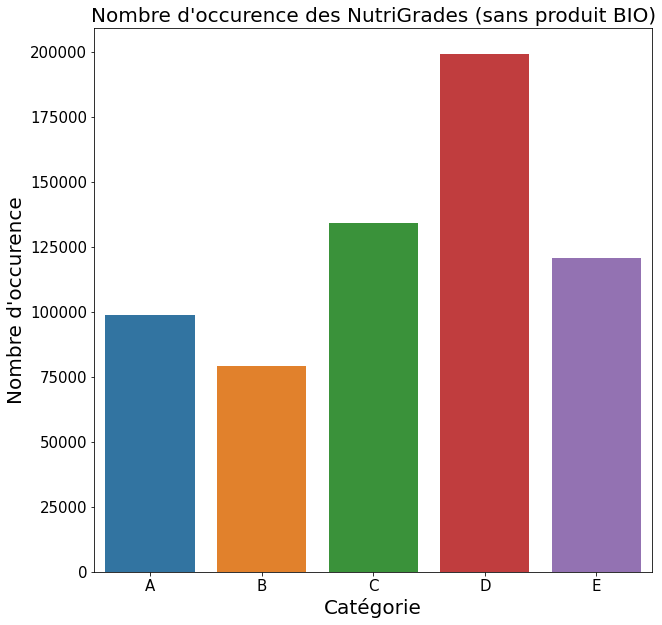

In [32]:
GradeIPlusRepresentées = collections.Counter(listeNutriGradeI).most_common(len(listeNutriGradeI))

NutrigradeIDataset = pd.DataFrame(GradeIPlusRepresentées, columns = ['Grade', 'Occurence']).sort_values(by = 'Grade', ascending = True)

plt.figure(figsize=(10, 10))
sns.barplot(x = NutrigradeIDataset['Grade'], 
            y = NutrigradeIDataset['Occurence'])
plt.title("Nombre d'occurence des NutriGrades (sans produit BIO)", fontsize=20)
plt.ylabel('Nombre d\'occurence', fontsize = 20)
plt.xlabel('Catégorie', fontsize = 20)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.show()

Comme pour le nutriscore, nous pouvons voir que proportionnellement les produit BIO ont un meilleur grade.

# Analyse Multivariée

Comme nous le savons le nutriscore va dépendre de différentes variables ce n'est donc pas une hypothèse pleine de risques que de l'affirmer, cependant nous allons essayer de savoir si les autres variables peuvent être corrélées entre elles et leur degrés de similitude (1 les varibles sont similaires, 0 elles ne le sont pas du tout).


##### Légère mise en garde

Pour la matrice de corrélation, nous utiliserons la méthode Spearman, en effet la méthode Pearson nécessite des distubutions normales de nos variables, hors on a vu que ce n'était pas le cas ici.

In [33]:
correlation = foodData.corr(method = 'spearman')
correlation = correlation.style.format("{:.2}").background_gradient(cmap = plt.get_cmap('coolwarm'))

correlation

,additives_n,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
additives_n,1.0,0.019,0.036,0.041,0.057,0.081,0.075,0.076,-0.083,-0.003,0.097,0.097,0.086
energy-kj_100g,0.019,1.0,0.16,0.28,0.16,0.14,0.14,0.057,0.11,0.073,0.017,0.017,0.18
energy-kcal_100g,0.036,0.16,1.0,0.98,0.65,0.55,0.47,0.22,0.18,0.31,0.079,0.078,0.31
energy_100g,0.041,0.28,0.98,1.0,0.67,0.56,0.48,0.22,0.2,0.31,0.083,0.083,0.33
fat_100g,0.057,0.16,0.65,0.67,1.0,0.86,0.0066,-0.049,0.096,0.42,0.26,0.26,0.3
saturated-fat_100g,0.081,0.14,0.55,0.56,0.86,1.0,-0.022,0.024,0.026,0.34,0.2,0.2,0.33
carbohydrates_100g,0.075,0.14,0.47,0.48,0.0066,-0.022,1.0,0.62,0.23,-0.093,-0.16,-0.16,0.12
sugars_100g,0.076,0.057,0.22,0.22,-0.049,0.024,0.62,1.0,0.063,-0.31,-0.27,-0.27,0.15
fiber_100g,-0.083,0.11,0.18,0.2,0.096,0.026,0.23,0.063,1.0,0.12,-0.014,-0.014,-0.028
proteins_100g,-0.003,0.073,0.31,0.31,0.42,0.34,-0.093,-0.31,0.12,1.0,0.41,0.41,0.076


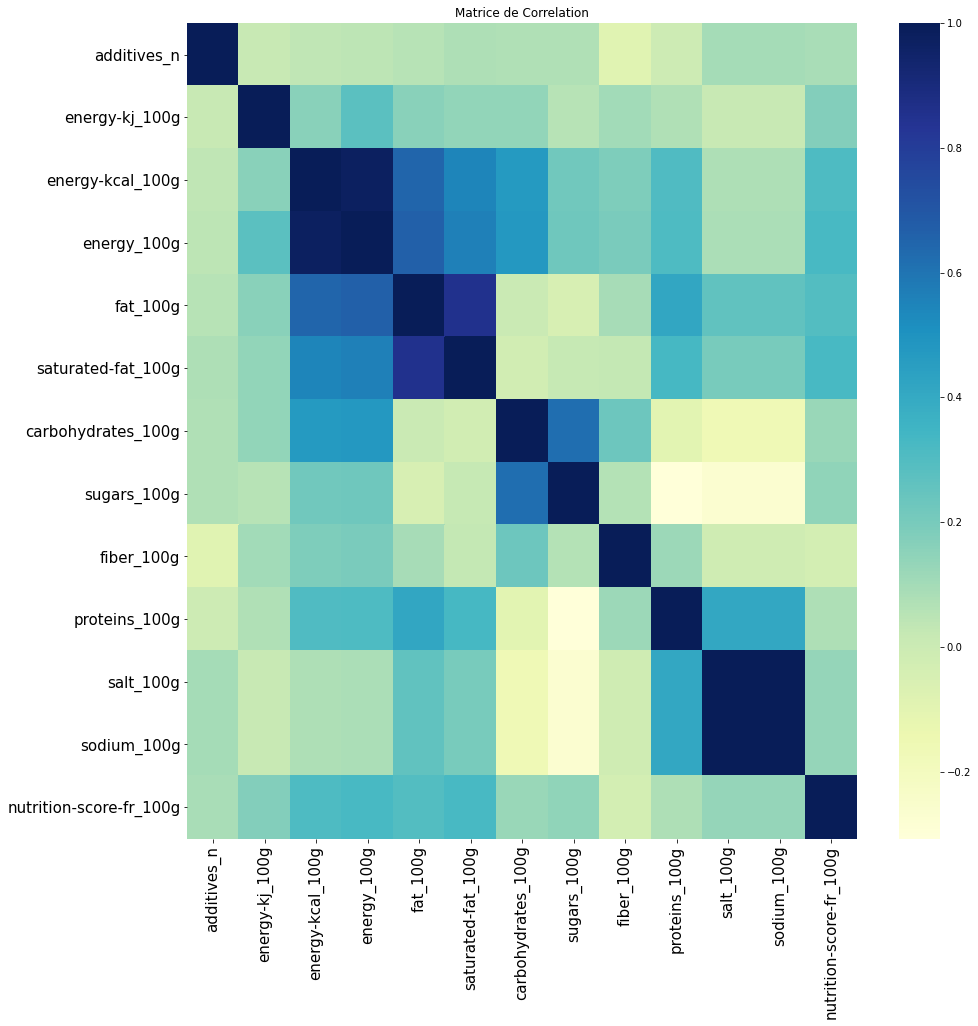

In [34]:
correlation = foodData.corr(method = 'spearman')
plt.figure(figsize=(15, 15))
plt.title("Matrice de Correlation")
sns.heatmap(correlation,  cmap="YlGnBu")
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)

Analyse de la matrice :

    La variable additives_n n'a pas de corrélations intéressantes.
    
    La variable energy-kj_100g n'a pas de corrélations intéressantes.
    
    Les variables energy-kcal_100g et energy_100g sont fortement corrélées, elles sont très corrélées avec la 
    variables fat_100g et moyennement corrélées avec saturated-fat_100g et carbohydrates_100g.
    
    Les variables fat_100g et saturated-fat_100g sont fortement corrélées et elles sont moyennement corrélées avec 
    energy-kcal_100g, energy_100g et proteins_100g.
    
    Les variables carbohydrates_100g et sugars_100g sont fortement corrélées et elles sont moyennement corrélées avec
    energy-kcal_100g et energy_100g.
    
    Les variables salt_100g et sodium_100g sont fortement corrélées et moyennement corrélées avec proteins_100g.
    
    La variable fiber_100g n'a pas de corrélations intéressantes.
    
    La variable proteins_100g est moyennement corrélées avec fat_100g, saturated-fat_100g, salt_100g, sodium_100g, 
    energy-kcal_100g et energy_100g.
    
    La variable nutrition-score-fr_100g n'a pas de corrélations intéressantes, ce qui est assez logique au final puisque 
    le nutriscore sera calculé en utilisant les variables gardées.

##### Légère mise en garde

Il faut cependant faire attention à cette matrice de corrélation, elle n'est pas fausse mais de nombreuses valeurs ont été modifiées et remplacées !

Regardons si cela changerait en utilisant le dataset de base sans valeurs aberrantes et sans valeurs manquantes.

Commencons par charger notre dataset sans outliers et sans valeurs manquantes:

In [35]:
correlation_sansOutliers_2 = foodData_sansOutliers_2.dropna().corr(method='spearman')
correlation_sansOutliers_2 = correlation_sansOutliers_2.style.format("{:.2}").background_gradient(cmap = plt.get_cmap('coolwarm'))

correlation_sansOutliers_2

,additives_n,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
additives_n,1.0,-0.0051,-0.0051,-0.0051,0.0026,0.069,0.16,0.16,0.0093,-0.035,0.11,0.11,0.18
energy-kj_100g,-0.0051,1.0,0.97,1.0,0.78,0.66,0.48,0.3,0.45,0.32,0.0032,0.0032,0.59
energy-kcal_100g,-0.0051,0.97,1.0,0.97,0.79,0.67,0.48,0.3,0.45,0.32,0.0073,0.0073,0.59
energy_100g,-0.0051,1.0,0.97,1.0,0.78,0.66,0.48,0.3,0.45,0.32,0.0032,0.0032,0.59
fat_100g,0.0026,0.78,0.79,0.78,1.0,0.87,0.0089,-0.027,0.26,0.4,0.18,0.18,0.56
saturated-fat_100g,0.069,0.66,0.67,0.66,0.87,1.0,0.015,0.047,0.14,0.4,0.091,0.091,0.63
carbohydrates_100g,0.16,0.48,0.48,0.48,0.0089,0.015,1.0,0.71,0.55,-0.016,-0.18,-0.18,0.27
sugars_100g,0.16,0.3,0.3,0.3,-0.027,0.047,0.71,1.0,0.33,-0.21,-0.45,-0.45,0.37
fiber_100g,0.0093,0.45,0.45,0.45,0.26,0.14,0.55,0.33,1.0,0.23,0.073,0.073,0.028
proteins_100g,-0.035,0.32,0.32,0.32,0.4,0.4,-0.016,-0.21,0.23,1.0,0.49,0.49,0.12


Nous pouvons voir qu'en ne prenant que "les vrais valeurs" du dataset nous obtenons de meilleurs corrélations, mais nous avons le même schéma de corrélations.

Nous voyons que la variable "additives_n" n'est que faiblement corrélée avec les autres variables, nous pouvons nous passer de cette variable. 

# Analyse Univariée et Multivariée avec KNN

Nous allons procéder excatement de la même manière que précèdemment, ce qui va changer ici ce sera seulement le fait que les valeurs manquantes et aberrantes seront remplacées par les valeurs des 3 plus proches voisins.
Ces valeurs sans être exact auront le mérite d'être un peu plus réaliste que la moyenne ou la médiane.

In [36]:
foodData_knn.head(5)

,additives_n,energy_100g,energy-kj_100g,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,fiber_100g,sodium_100g,salt_100g,nutrition-score-fr_100g
0,0.666667,1569.000000,1604.000000,375.000000,7.800000,70.10000,15.000000,7.000000,3.080000,2.333333,0.560000,1.400000,7.666667
1,1.592354,1151.182091,1059.275500,276.766589,9.023486,26.58316,13.600134,14.189216,5.429899,2.894638,0.497405,1.240394,11.329233
2,0.000000,936.000000,936.000000,221.000000,5.100000,29.00000,22.000000,8.200000,2.200000,0.000000,1.840000,4.600000,18.000000
3,1.592354,1151.182091,1059.275500,276.766589,9.023486,26.58316,13.600134,14.189216,5.429899,2.894638,0.497405,1.240394,11.329233
4,0.666667,88.000000,101.666667,21.000000,0.200000,4.80000,0.400000,0.000000,0.000000,1.833333,0.816000,2.040000,8.000000


In [37]:
foodData_knn.shape

(652996, 13)

In [38]:
for variable in foodData_knn.columns:
    print("Variable:", variable, "\n", foodData_knn[variable].describe(), '\n')

Variable: additives_n 
 count    652996.000000
mean          1.270806
std           1.638935
min           0.000000
25%           0.000000
50%           1.000000
75%           1.592354
max          20.000000
Name: additives_n, dtype: float64 

Variable: energy_100g 
 count    652996.000000
mean       1134.193211
std         726.424825
min           0.000000
25%         569.000000
50%        1151.182091
75%        1536.000000
max        6042.000000
Name: energy_100g, dtype: float64 

Variable: energy-kj_100g 
 count    652996.000000
mean       1143.906751
std         727.837596
min           0.000000
25%         610.666667
50%        1059.275500
75%        1563.000000
max        5227.000000
Name: energy-kj_100g, dtype: float64 

Variable: energy-kcal_100g 
 count    652996.000000
mean        271.837414
std         174.086956
min           0.000000
25%         136.000000
50%         276.766589
75%         368.000000
max        1453.000000
Name: energy-kcal_100g, dtype: float64 

Variable

In [39]:
listeVariableNumerique_knn = []
for variable in foodData_knn.columns:
    if foodData_knn[variable].dtypes == 'int64' or foodData_knn[variable].dtypes == 'float64':
        listeVariableNumerique_knn.append(variable)        

In [40]:
listeVariable100g_knn = []
listeEnergy_knn = []
listeAdditives_knn = []
listeNutriscore_knn = []
pattern100g = '100g'
patternEnergy = 'energy'
patternAdditives = 'additives'
patternNutriscore = 'nutri'
for variable in listeVariableNumerique_knn:
    if re.search(pattern100g, variable):
        listeVariable100g_knn.append(variable)
    if re.search(patternEnergy, variable):
        listeEnergy_knn.append(variable)
    if re.search(patternAdditives, variable):
        listeAdditives_knn.append(variable)
    if re.search(patternNutriscore, variable):
        listeNutriscore_knn.append(variable)

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


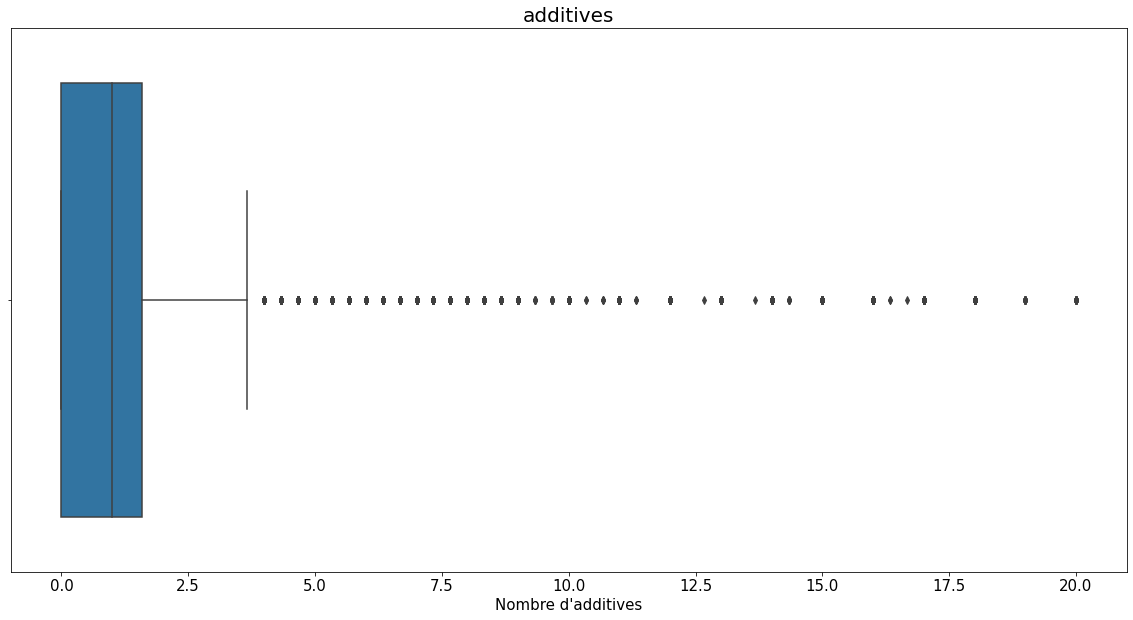

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


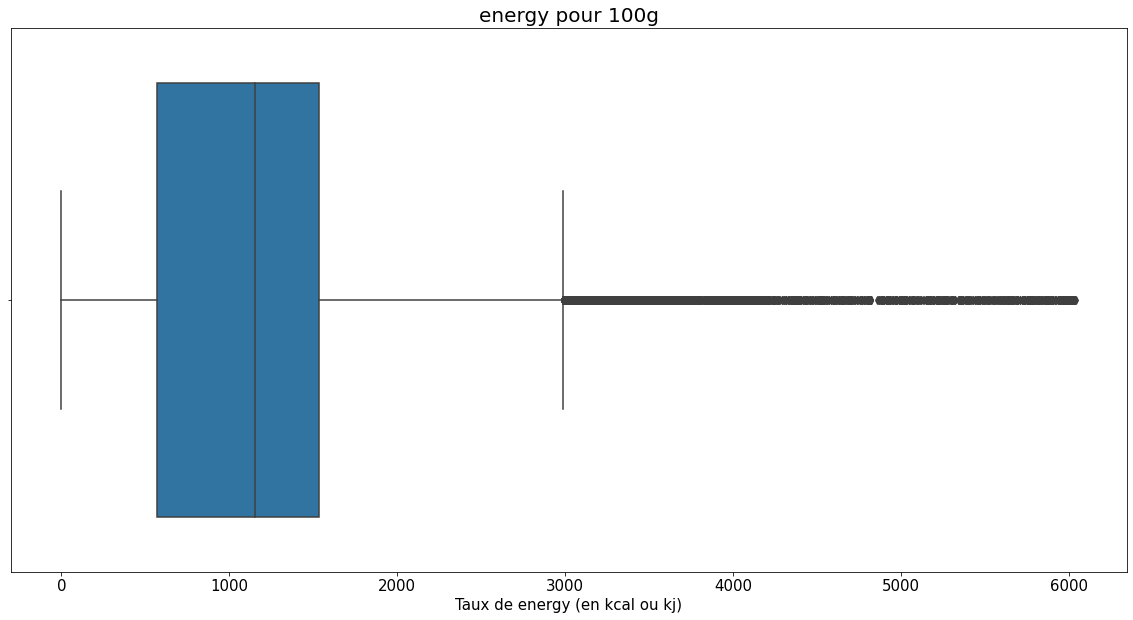

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


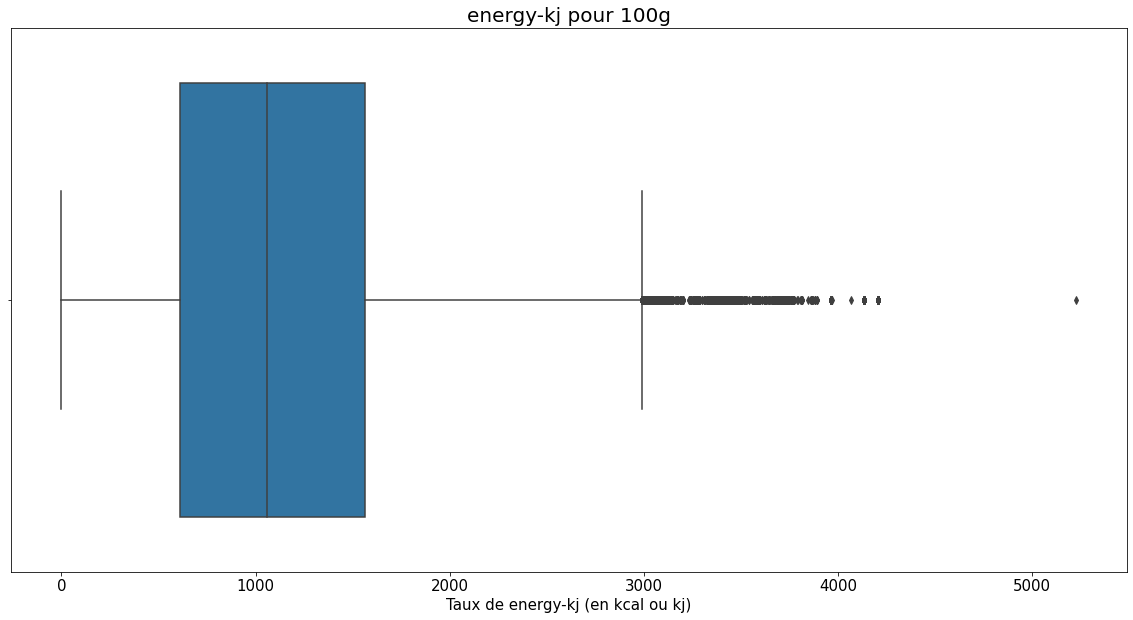

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


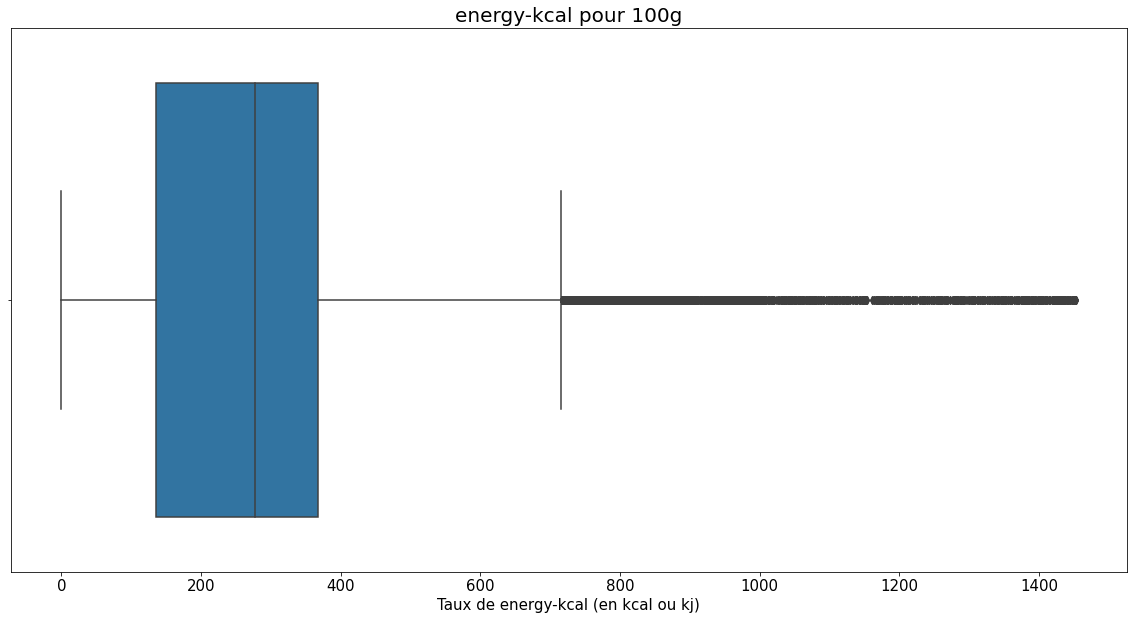

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


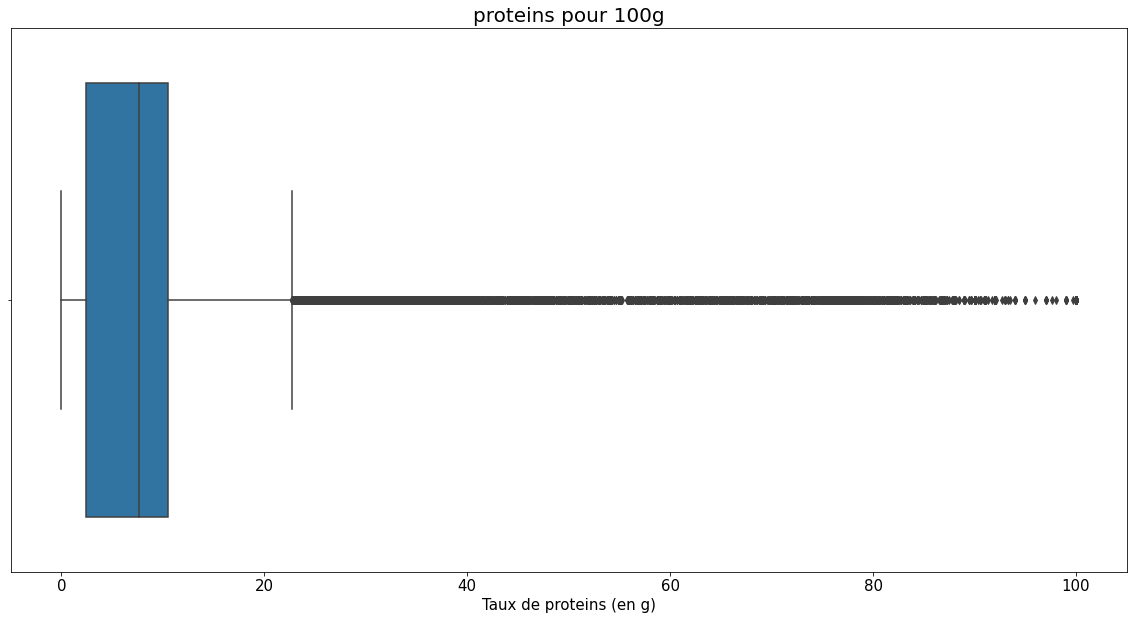

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


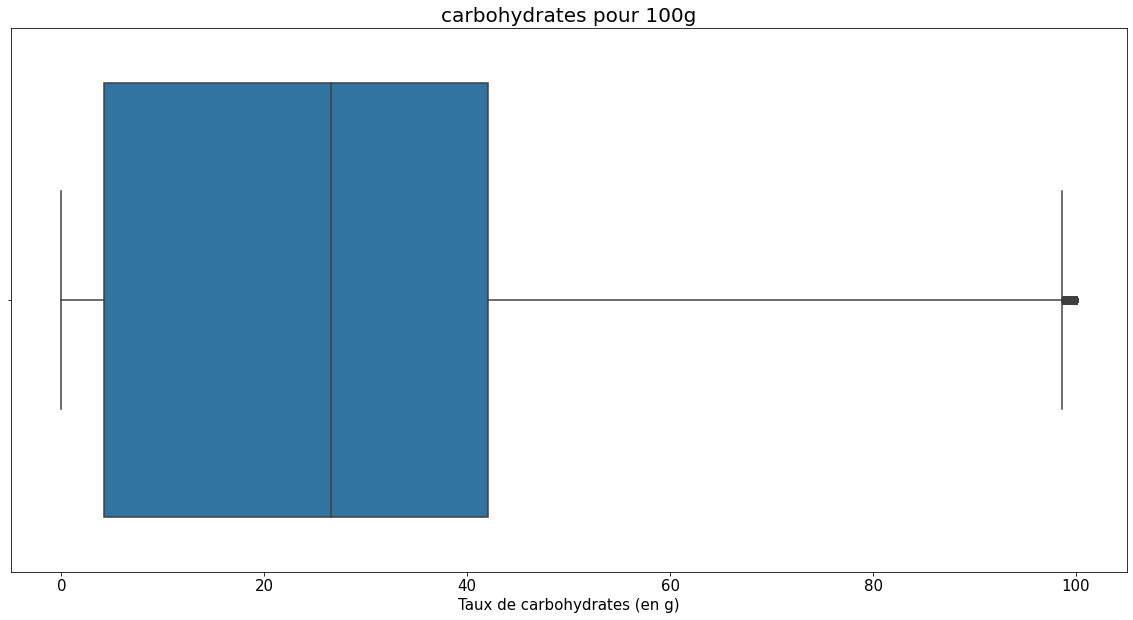

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


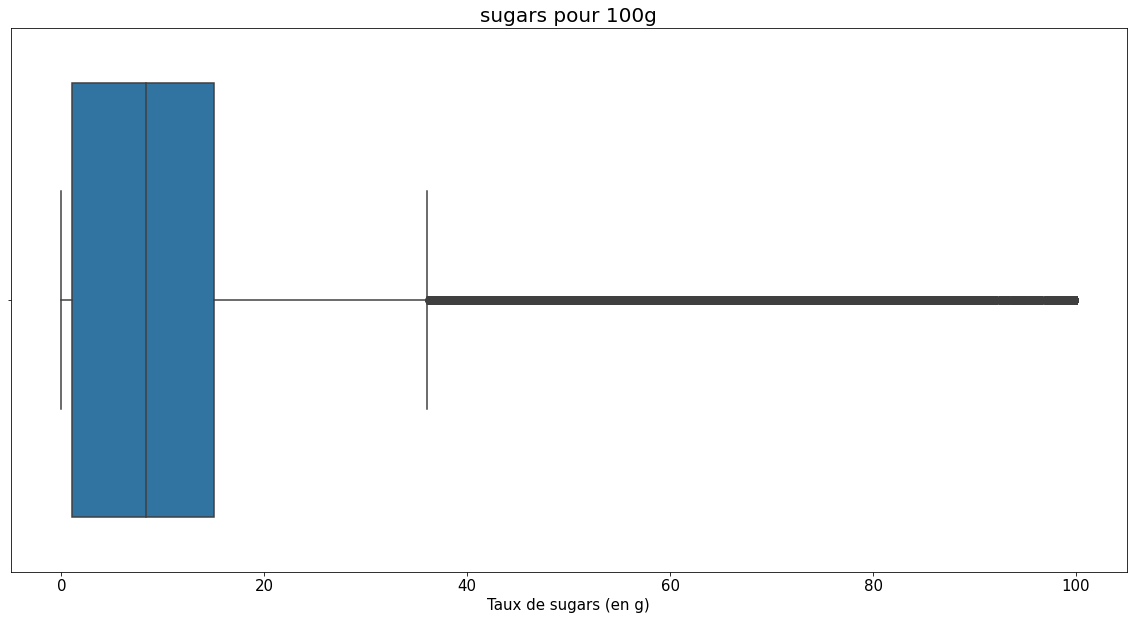

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


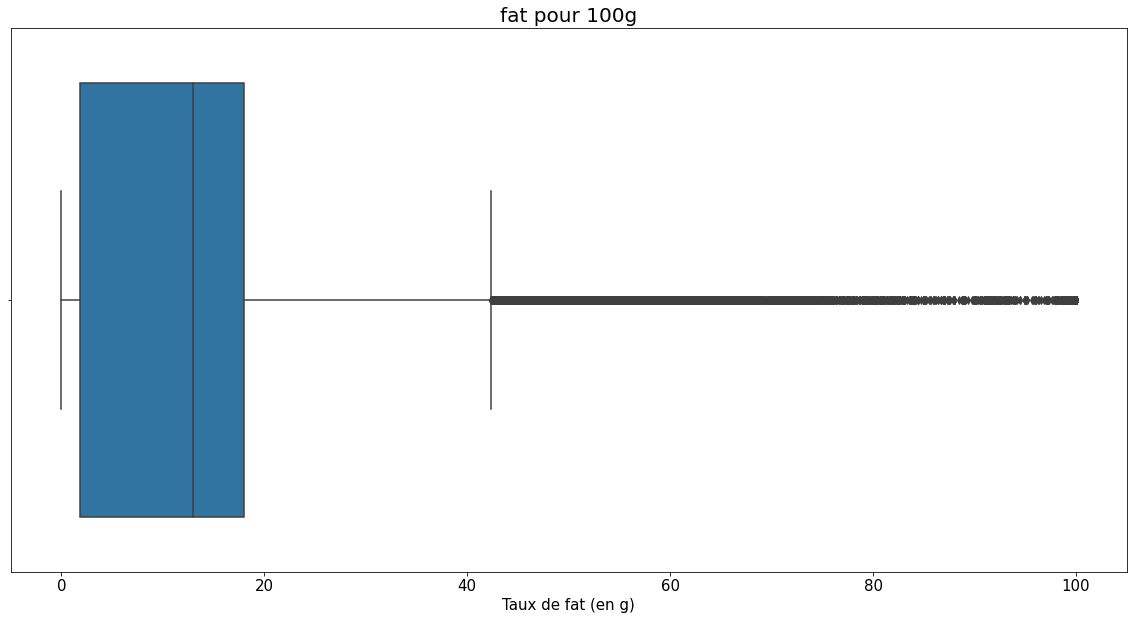

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


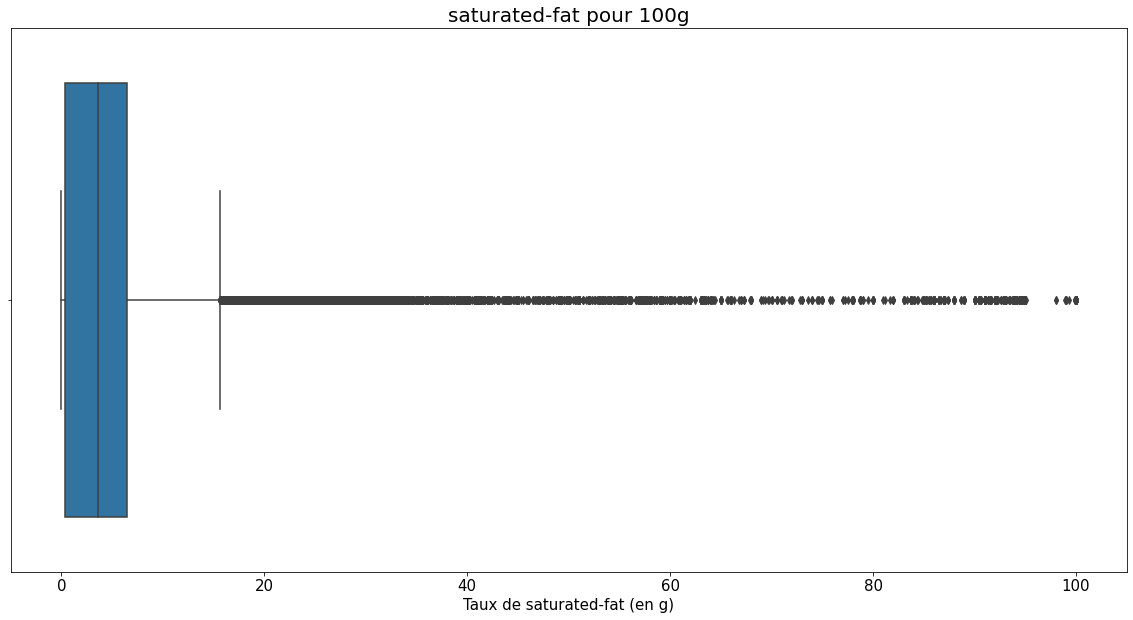

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


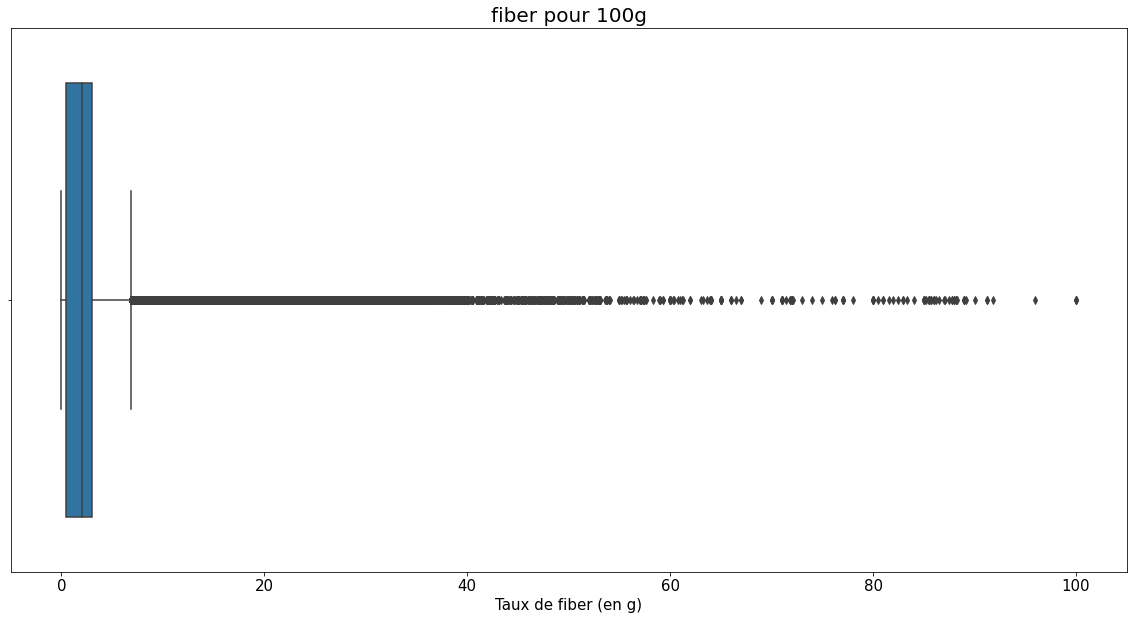

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


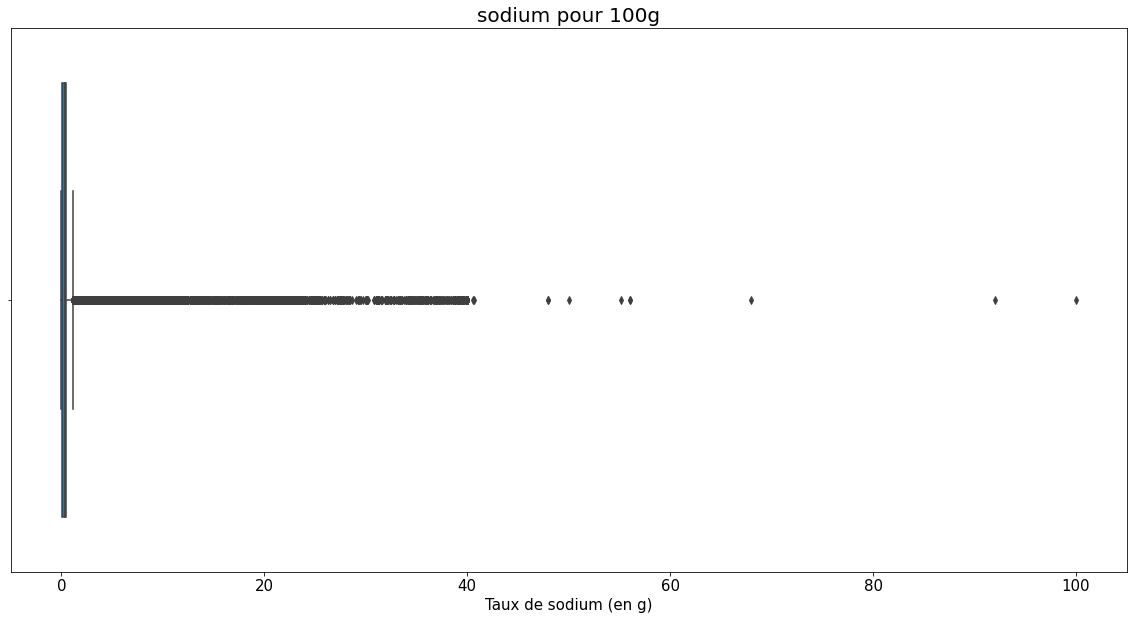

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


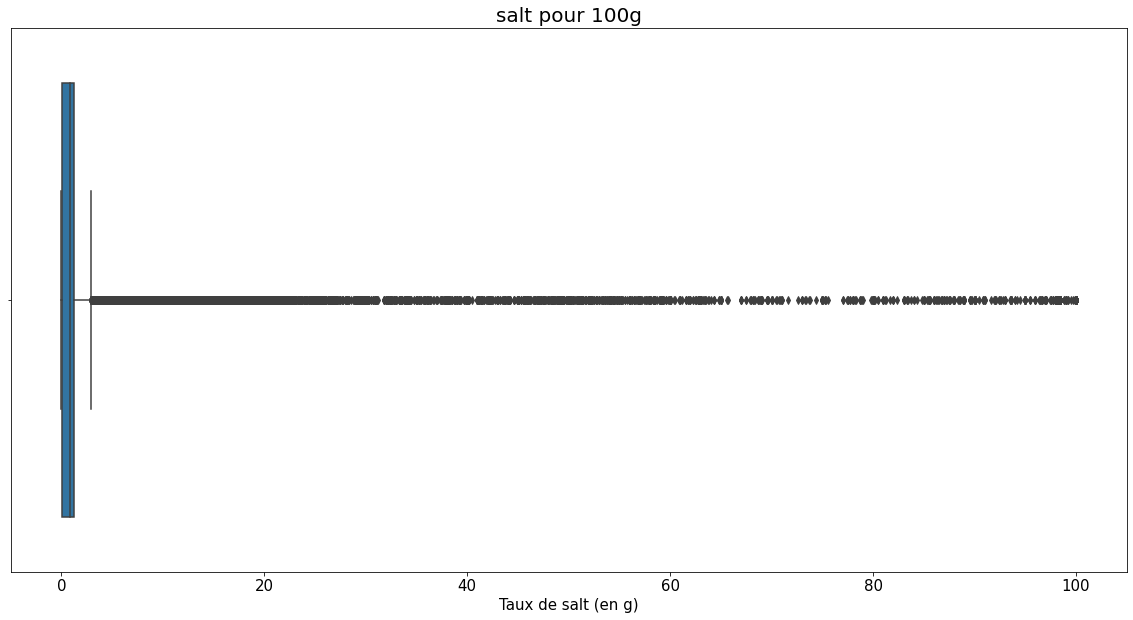

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


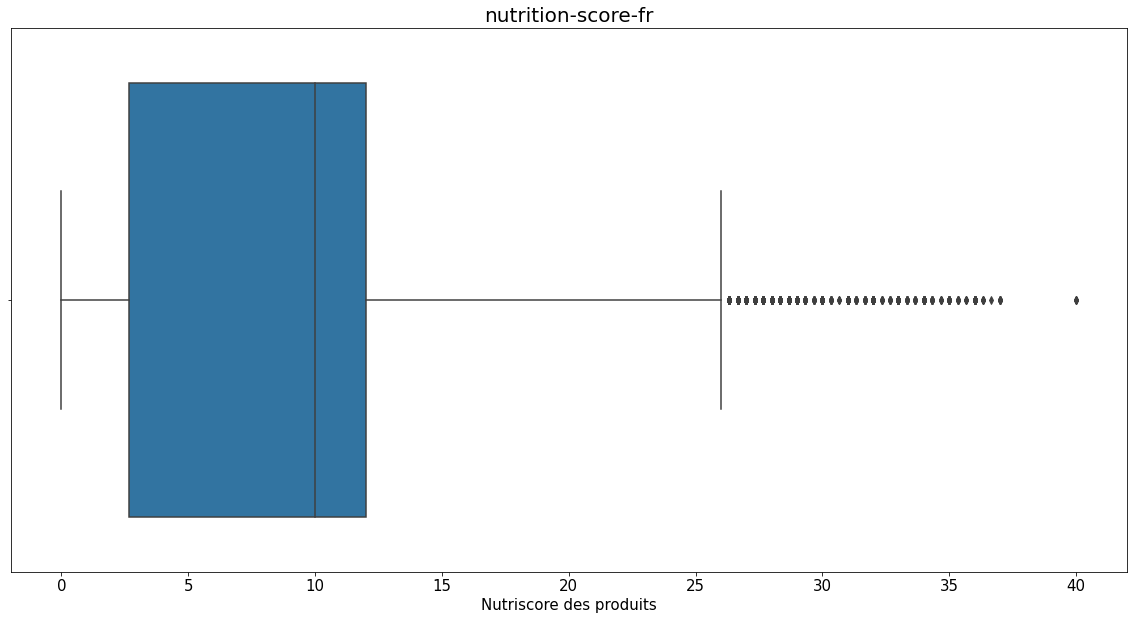

In [41]:
for variable in listeVariableNumerique_knn:
    if variable in listeVariable100g_knn and variable not in listeEnergy_knn and variable not in listeNutriscore_knn:        
        plt.figure(figsize = (20, 10))    
        sns.boxplot(foodData_knn[variable])  
        variable = re.split('_', variable)
        plt.title(variable[0] + " pour 100g", fontsize = 20)
        plt.xlabel("Taux de " + variable[0] + " (en g)", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()  
        
    if variable in listeEnergy_knn:
        plt.figure(figsize = (20, 10))    
        sns.boxplot(foodData_knn[variable]) 
        variable = re.split('_', variable)
        plt.title(variable[0] + " pour 100g", fontsize = 20)
        plt.xlabel("Taux de " + variable[0] + " (en kcal ou kj)", fontsize = 15)        
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
        
    if variable in listeAdditives_knn:
        plt.figure(figsize = (20, 10))    
        sns.boxplot(foodData_knn[variable]) 
        variable = re.split('_', variable)
        plt.title(variable[0], fontsize = 20)
        plt.xlabel("Nombre d'additives", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
        
    if variable in listeNutriscore_knn:
        plt.figure(figsize = (20, 10))    
        sns.boxplot(foodData_knn[variable])   
        variable = re.split('_', variable)
        plt.title(variable[0], fontsize = 20)
        plt.xlabel("Nutriscore des produits", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show() 

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


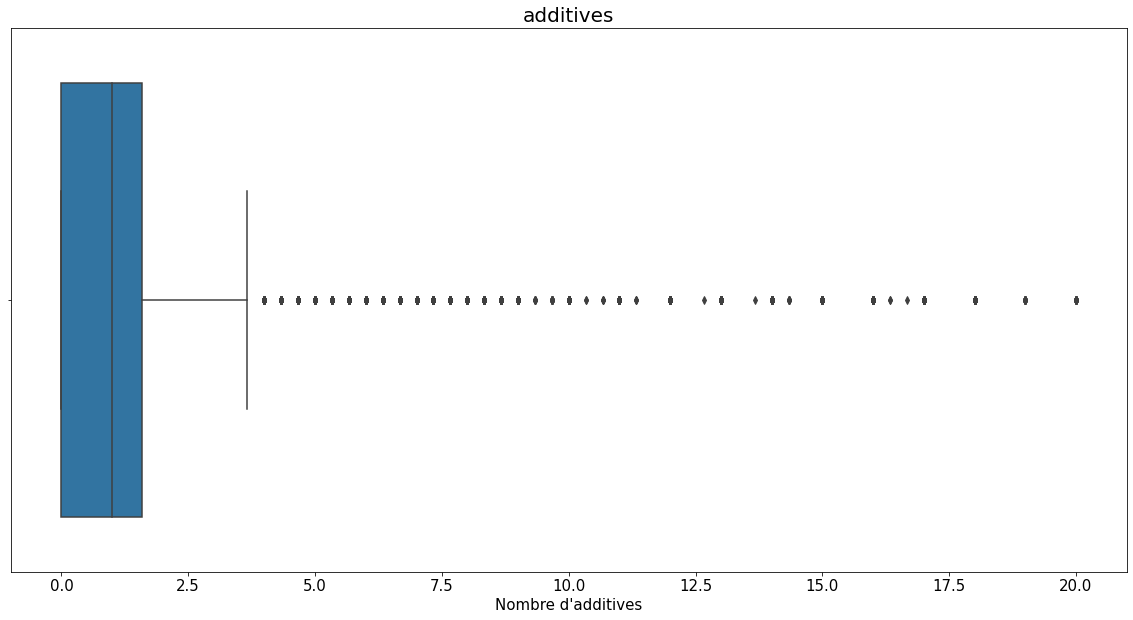

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


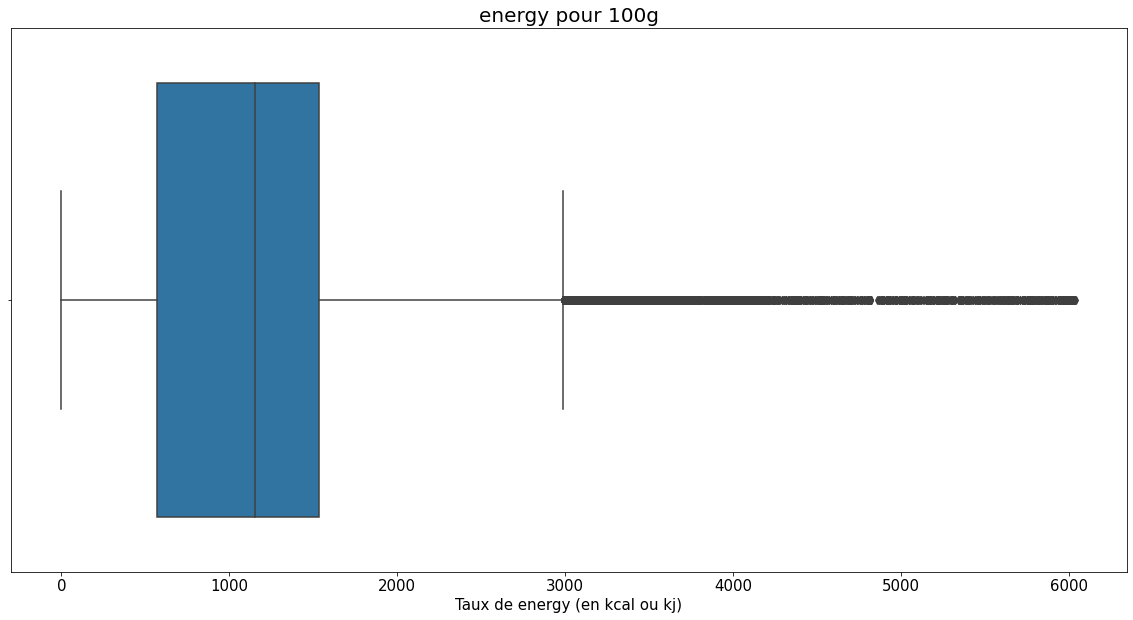

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


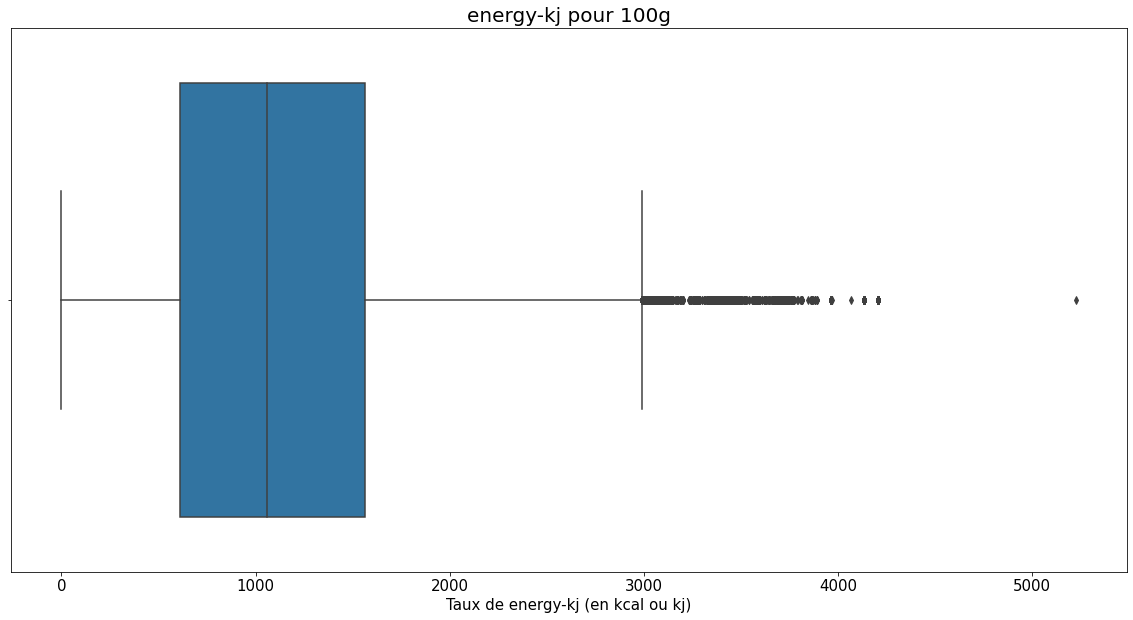

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


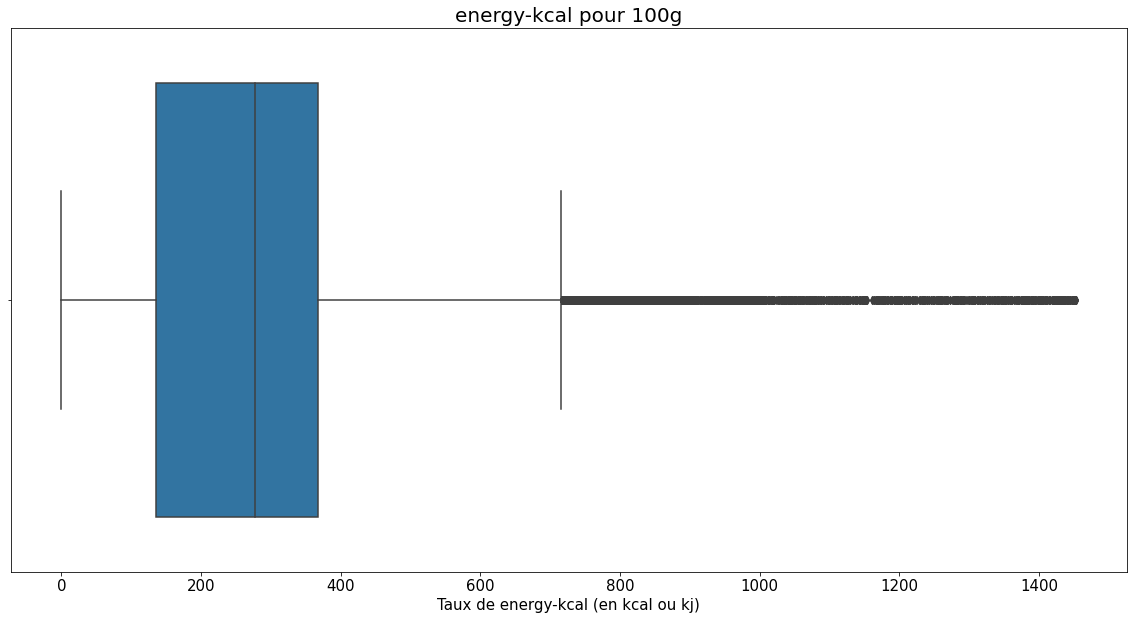

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


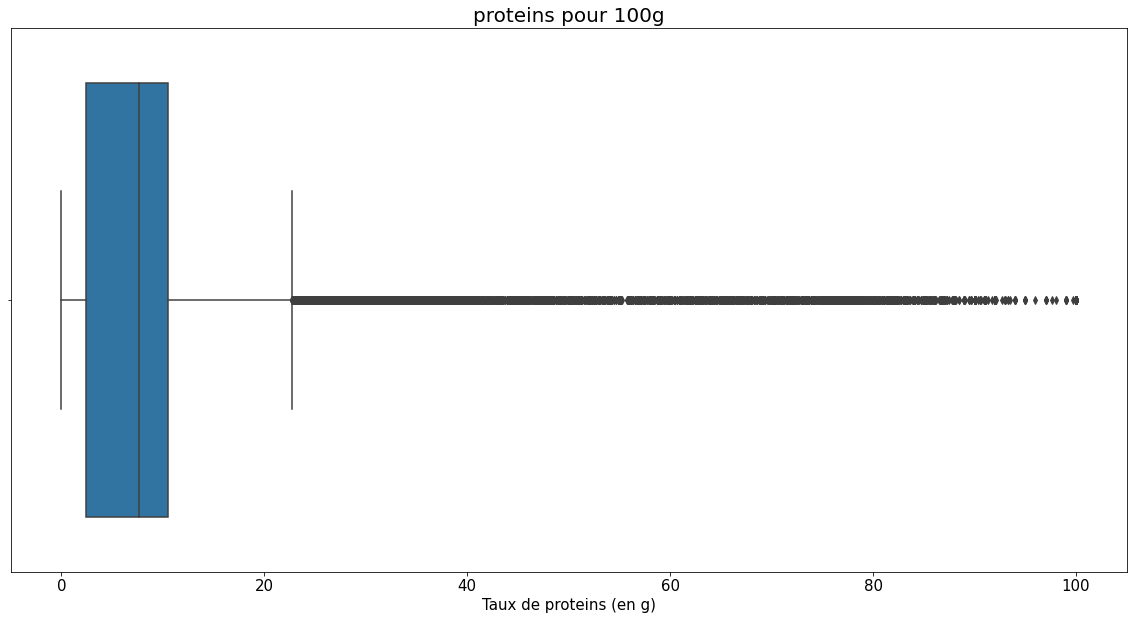

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


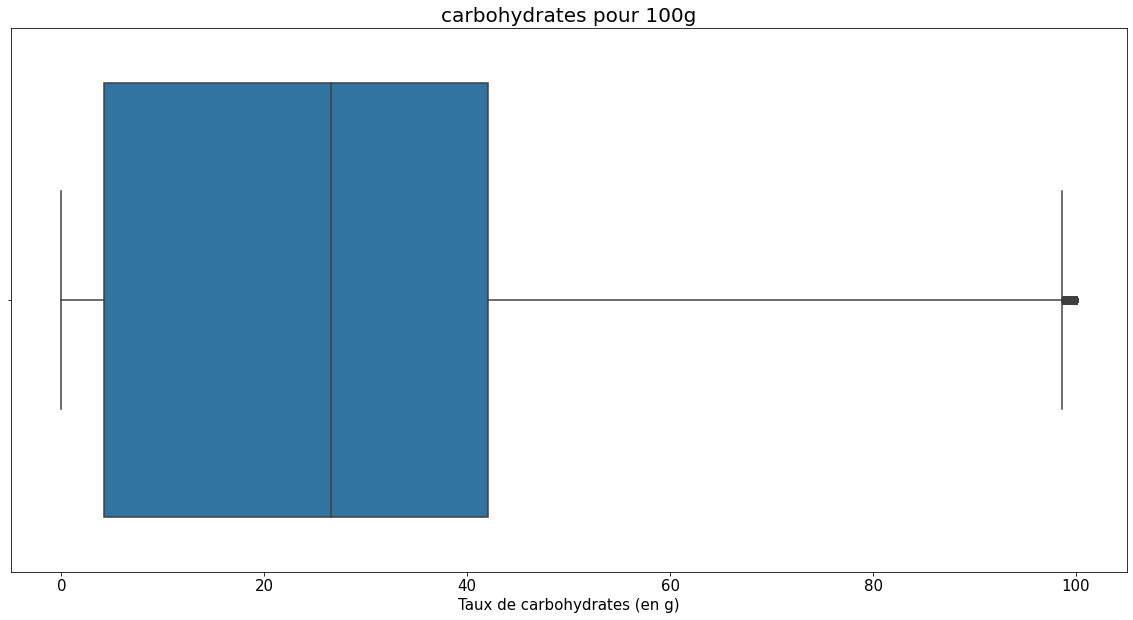

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


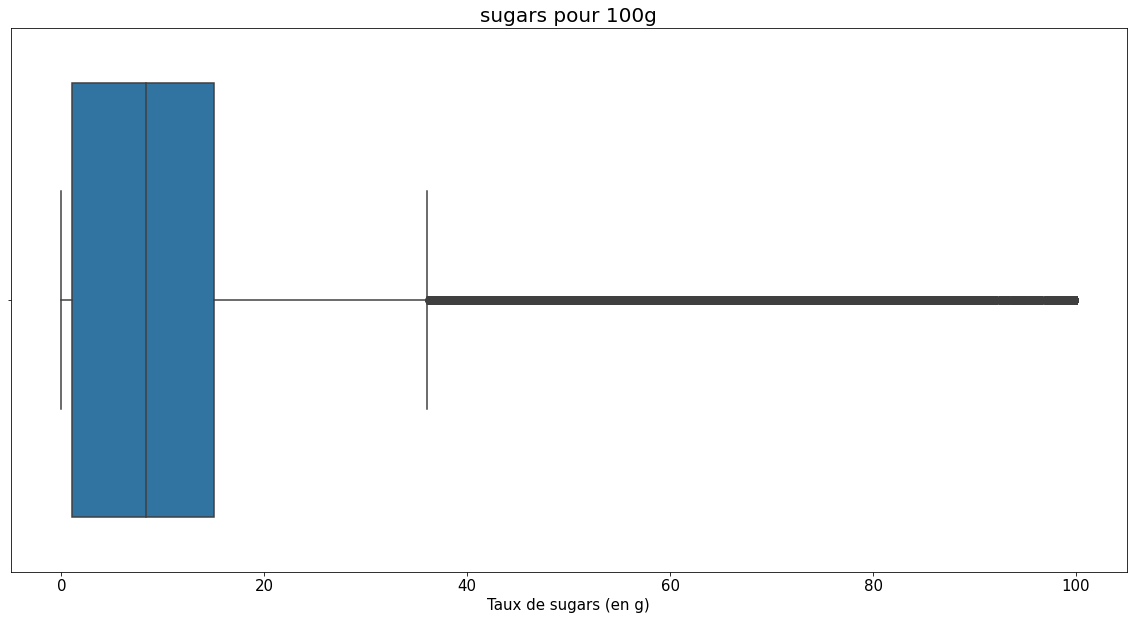

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


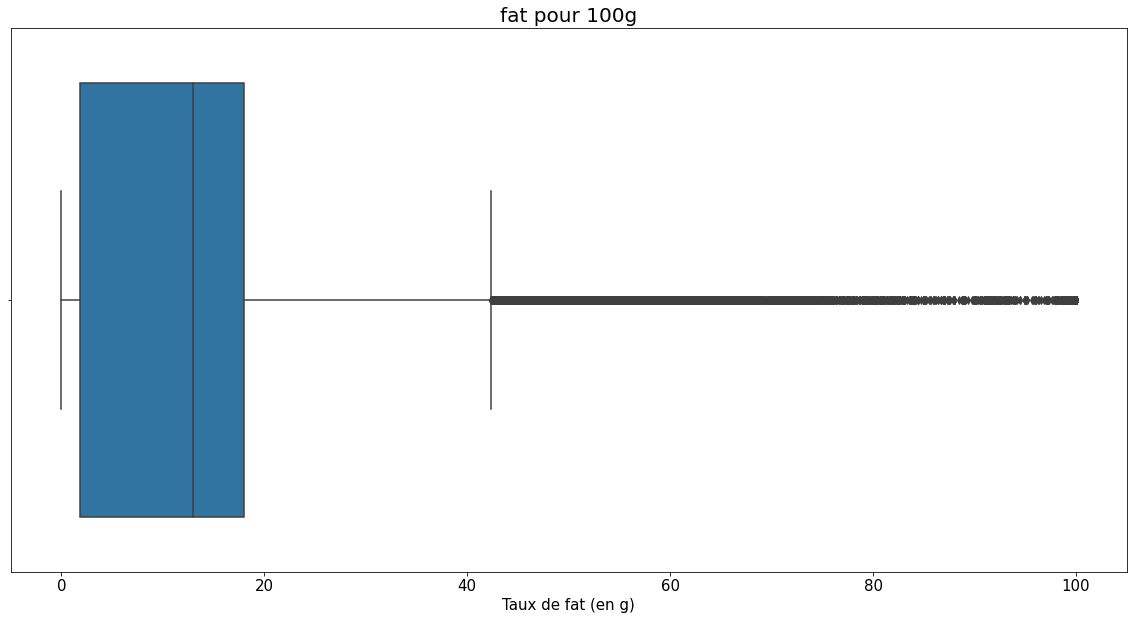

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


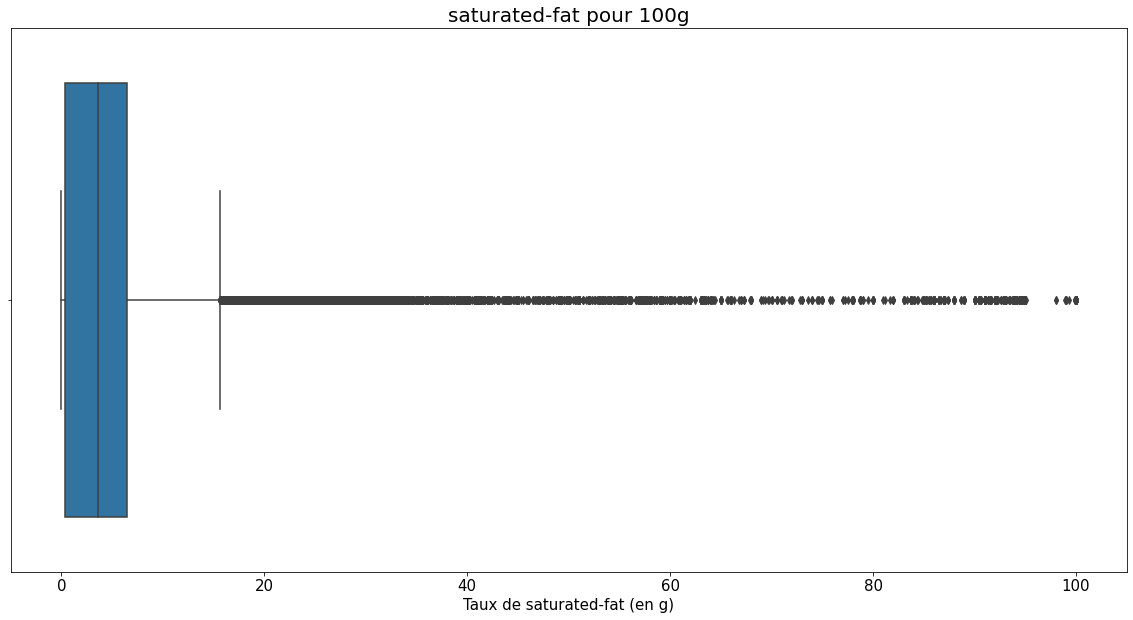

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


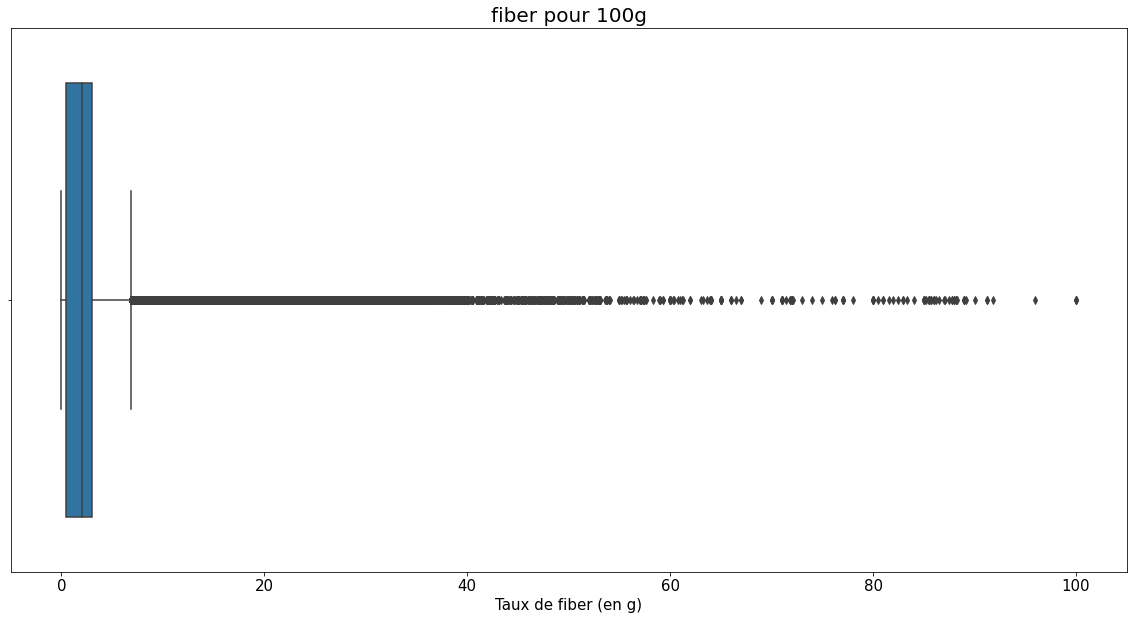

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


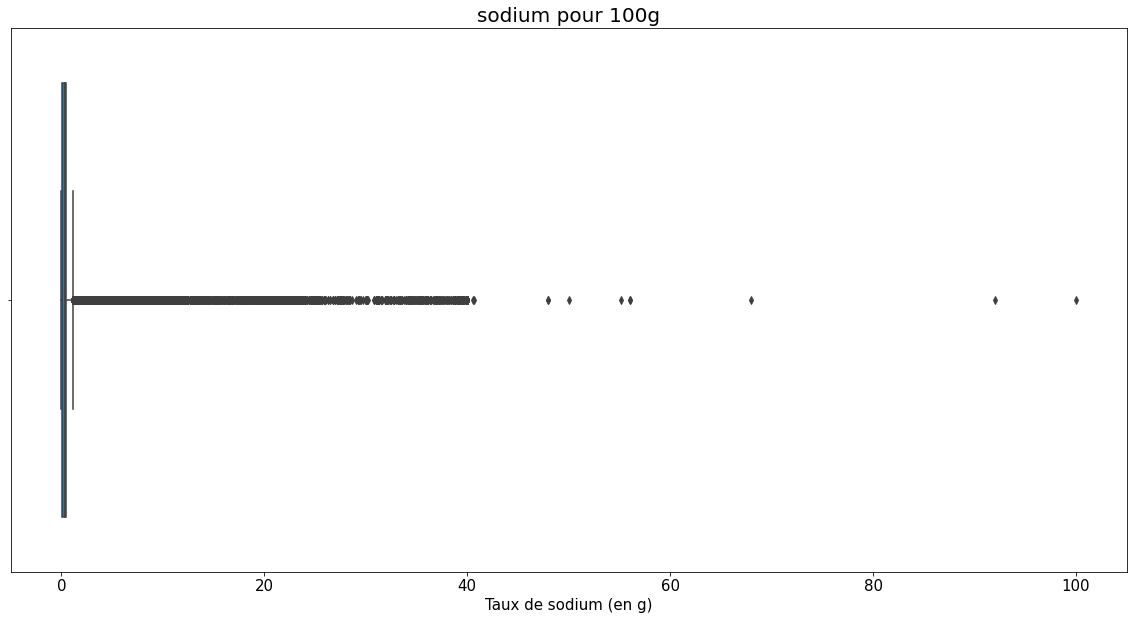

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


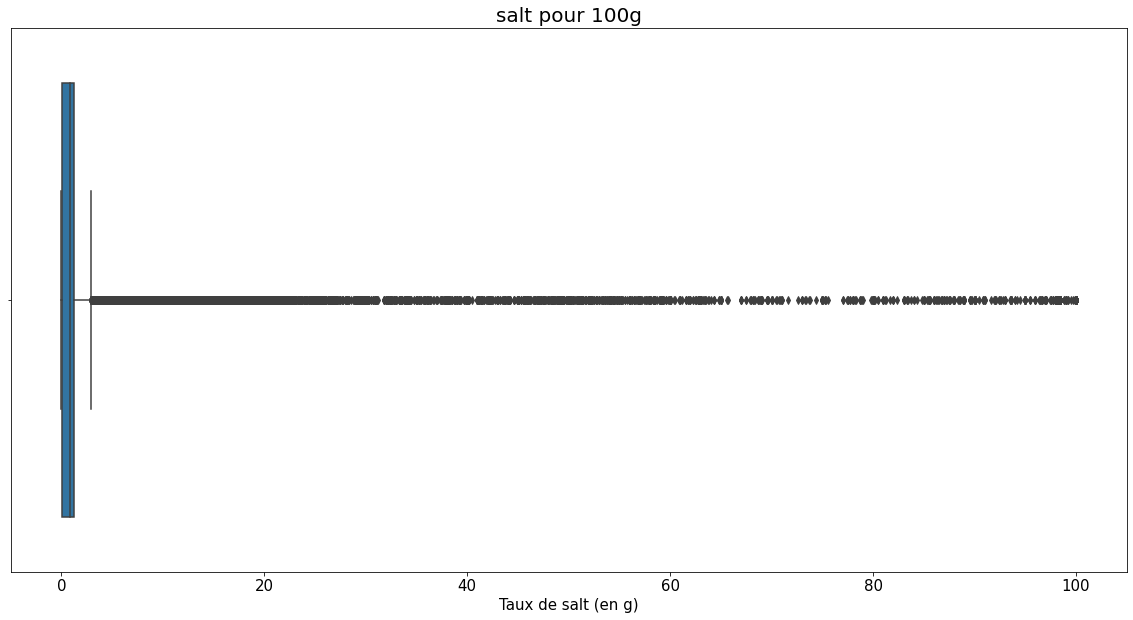

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


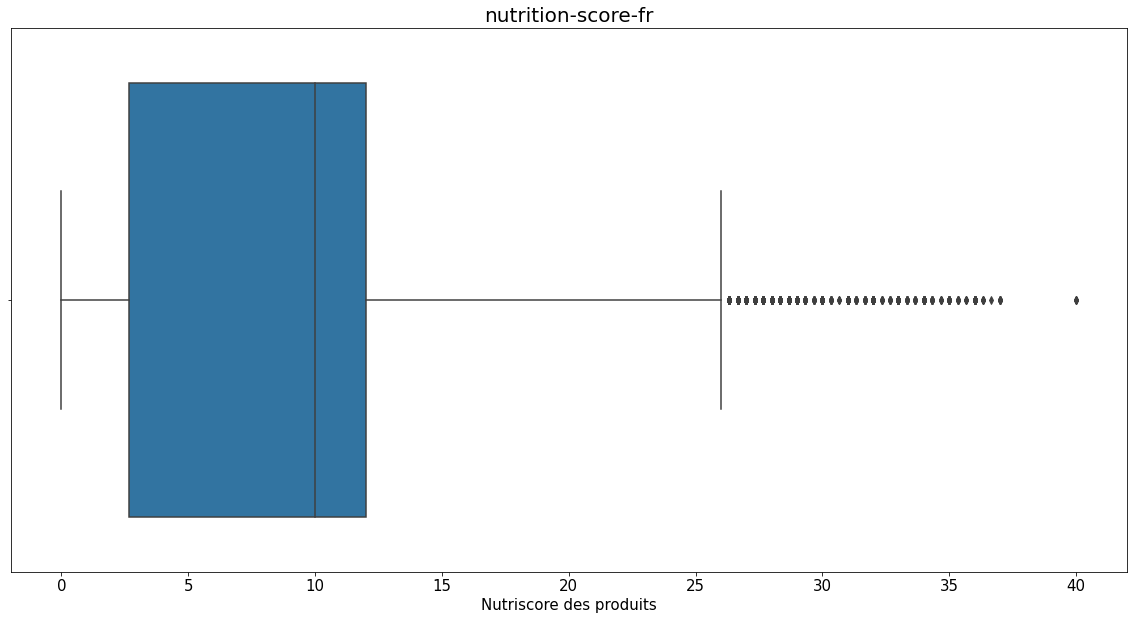

In [42]:
for variable in listeVariableNumerique_knn:
    if variable in listeVariable100g_knn and variable not in listeEnergy_knn and variable not in listeNutriscore_knn:        
        plt.figure(figsize = (20, 10))    
        sns.boxplot(foodData_knn[variable])  
        variable = re.split('_', variable)
        plt.title(variable[0] + " pour 100g", fontsize = 20)
        plt.xlabel("Taux de " + variable[0] + " (en g)", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()  
        
    if variable in listeEnergy_knn:
        plt.figure(figsize = (20, 10))    
        sns.boxplot(foodData_knn[variable]) 
        variable = re.split('_', variable)
        plt.title(variable[0] + " pour 100g", fontsize = 20)
        plt.xlabel("Taux de " + variable[0] + " (en kcal ou kj)", fontsize = 15)        
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
        
    if variable in listeAdditives_knn:
        plt.figure(figsize = (20, 10))    
        sns.boxplot(foodData_knn[variable]) 
        variable = re.split('_', variable)
        plt.title(variable[0], fontsize = 20)
        plt.xlabel("Nombre d'additives", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
        
    if variable in listeNutriscore_knn:
        plt.figure(figsize = (20, 10))    
        sns.boxplot(foodData_knn[variable])   
        variable = re.split('_', variable)
        plt.title(variable[0], fontsize = 20)
        plt.xlabel("Nutriscore des produits", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()  

Même dans le cas d'imputation des valeurs manquantes et des valeurs aberrantes via KNN, les variables n'ont pas une distribution normale.

In [43]:
correlation_knn = foodData_knn.corr(method = 'spearman')
correlation_knn = correlation_knn.style.format("{:.2}").background_gradient(cmap = plt.get_cmap('coolwarm'))

correlation_knn

,additives_n,energy_100g,energy-kj_100g,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,fiber_100g,sodium_100g,salt_100g,nutrition-score-fr_100g
additives_n,1.0,-0.011,0.00039,-0.0076,-0.018,0.049,0.11,-0.012,0.0066,-0.15,0.072,0.072,0.19
energy_100g,-0.011,1.0,0.95,1.0,0.32,0.48,0.3,0.69,0.6,0.25,0.11,0.11,0.35
energy-kj_100g,0.00039,0.95,1.0,0.94,0.25,0.47,0.32,0.64,0.56,0.24,0.036,0.036,0.33
energy-kcal_100g,-0.0076,1.0,0.94,1.0,0.32,0.48,0.3,0.69,0.6,0.24,0.11,0.11,0.35
proteins_100g,-0.018,0.32,0.25,0.32,1.0,-0.14,-0.27,0.43,0.41,0.13,0.5,0.5,0.27
carbohydrates_100g,0.049,0.48,0.47,0.48,-0.14,1.0,0.75,0.012,0.033,0.38,-0.19,-0.19,0.024
sugars_100g,0.11,0.3,0.32,0.3,-0.27,0.75,1.0,0.032,0.11,0.25,-0.24,-0.24,0.077
fat_100g,-0.012,0.69,0.64,0.69,0.43,0.012,0.032,1.0,0.89,0.16,0.35,0.35,0.45
saturated-fat_100g,0.0066,0.6,0.56,0.6,0.41,0.033,0.11,0.89,1.0,0.11,0.33,0.33,0.47
fiber_100g,-0.15,0.25,0.24,0.24,0.13,0.38,0.25,0.16,0.11,1.0,0.025,0.025,-0.016


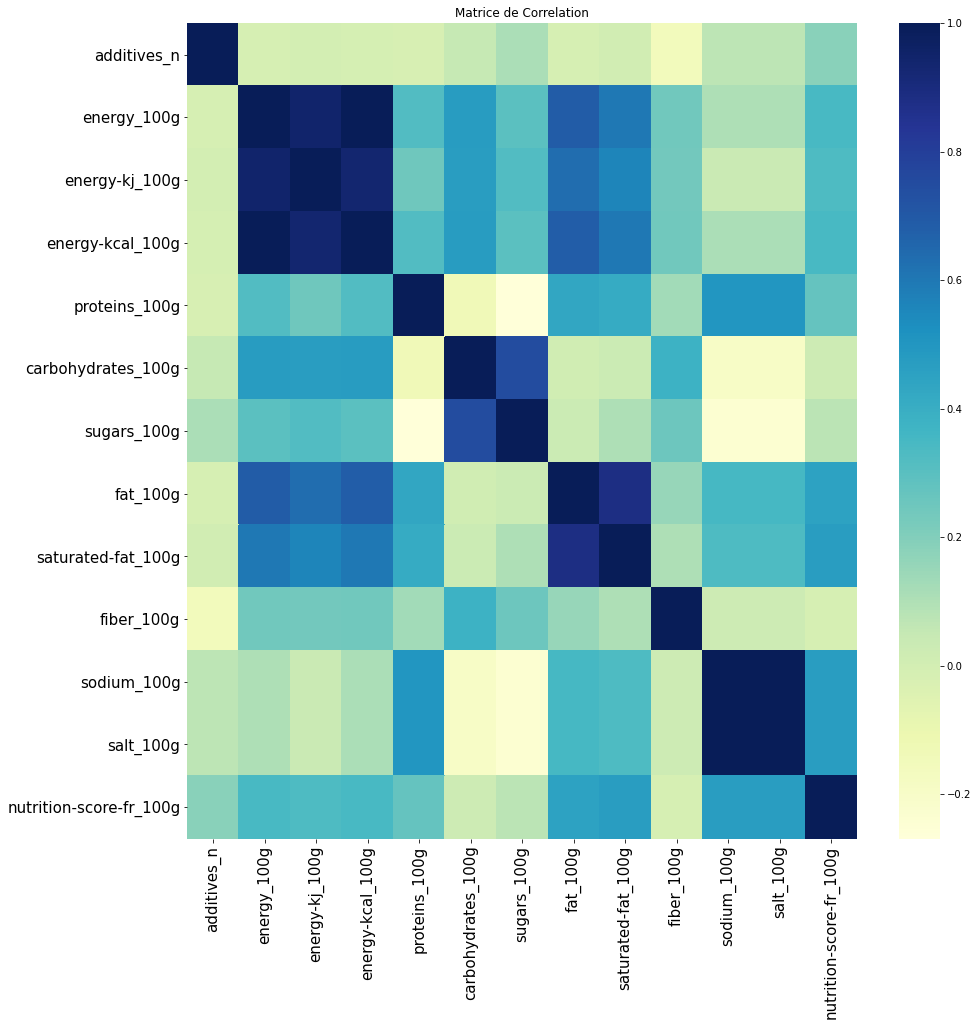

In [44]:
correlation_knn = foodData_knn.corr(method = 'spearman')
plt.figure(figsize=(15, 15))
plt.title("Matrice de Correlation")
sns.heatmap(correlation_knn,  cmap="YlGnBu")
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)

Dans l'ensemble la matrice de corrélation est semblable à ce que l'on avait précèdemment, cependant pour la variable "nutrition-score-fr_100g" nous pouvons maintenant voir une correlation plus importante des variables "sodium_100g" et "salt_100g".
Ces résultats sont logiques puisque contrairement au remplacement via moyenne ou médiane, la valeur a remplacer sera attribuée au nouveau point de données en fonction de sa correspondance étroite avec les points du jeu d’apprentissage.

D'après ce que nous avons pu voir à travers les différentes matrices de corrélations, différentes variables sont semblables, on peut même dire équivalentes pour certaines, c'est le cas pour les différentes energy, pour sugars_100g et carbohydrates_100g, pour fat_100g et saturated_100g ainsi que salt_100g et sodium_100g.
On peut donc n'en prendre qu'une d'entre elles au lieu de prendre les 2 ou les 3 variables qui se ressemblent.

Comme on pouvait se douter également les variables ne sont pas corrélées entre elles outre mesure, hormi le nutriscore qui est corrélé avec les autres variables puisque ce dernier est calculé en fonction de ces dernières.

##### Légère mise en garde

Nous avons également pu voir que nos variables n'ont pas une distribution normale, dans ce cas l'analyse de la variance (ANOVA) ne pourra pas être réalisée, puisque c'est l'une des conditions nécessaires pour sa réalisation.

# Réduction dimensionnelle

Afin d'étudier la variabilité des individus (leurs ressemblances et différences) et les liaisons entre les variables nous allons utiliser l'ACP. 
Nous pouvons également utiliser l'ACP pour effectuer une réduction dimensionnelle.

In [45]:
from sklearn import decomposition
from sklearn import preprocessing

In [46]:
# choix du nombre de composantes à calculer
n_comp = foodData.select_dtypes(['float64']).shape[1]

In [47]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca = foodData.select_dtypes(['float64'])

In [48]:
# préparation des données pour l'ACP
X = data_pca.values
features = foodData.select_dtypes(['float64']).columns

In [49]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [50]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components = n_comp)
pca.fit(X_scaled)
pcs = pca.components_

In [51]:
scree = pca.explained_variance_ratio_ * 100

Text(0.5, 1.0, 'Eboulis des valeurs propres')

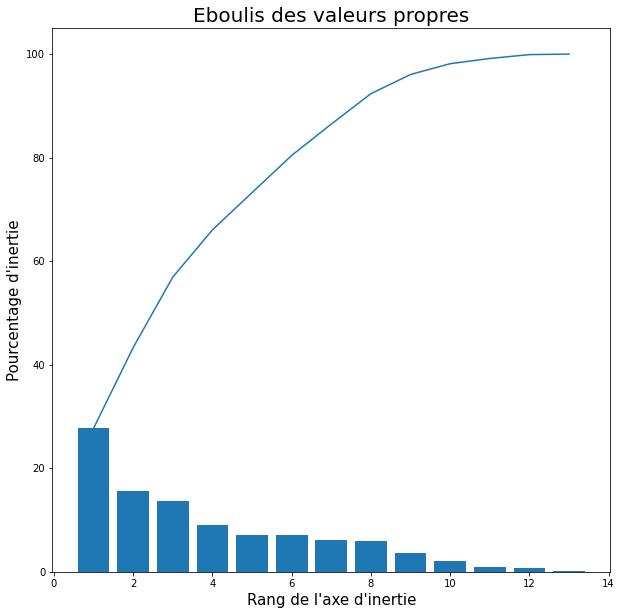

In [52]:
plt.figure(figsize = (10, 10)) 
plt.plot(np.arange(len(scree))+1, scree.cumsum())
plt.bar(np.arange(len(scree))+1, scree)
plt.xlabel("Rang de l'axe d'inertie", fontsize = 15)
plt.ylabel("Pourcentage d'inertie", fontsize = 15)
plt.title("Eboulis des valeurs propres", fontsize = 20)

Nous pouvons voir qu'à partir de 8 composantes le pourcentage d’inertie diminue beaucoup plus lentement. Le dataset pourrait être réduite à 8 composantes/ variables.

A ce niveau la réduction dimensionnelle ne sera pas très utile, elle n'aura donc pas de réel intérêt dans notre cas.

Cela traduit une certaine indépendance de nos variables puisque nous ne pouvons réduire le nombre de composante de manière intéressante.

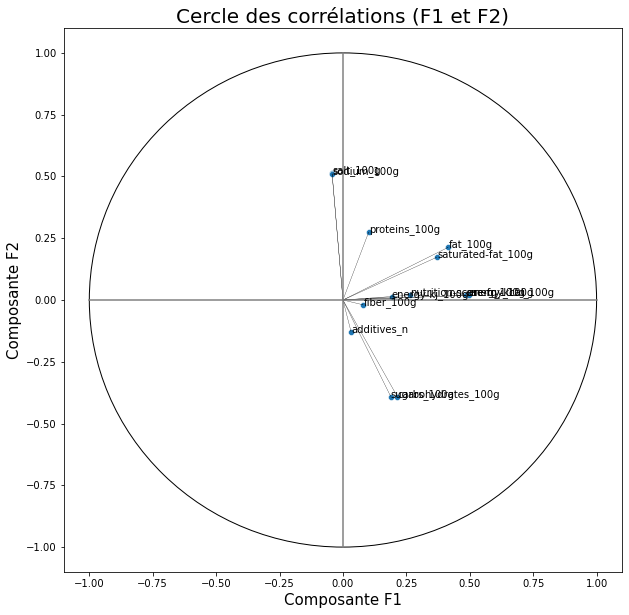

In [53]:
from matplotlib.patches import Circle
from matplotlib.collections import LineCollection


plt.figure(figsize=(10, 10))
plt.title('Cercle des corrélations (F1 et F2)', fontsize = 20)
plt.xlabel('Composante F1', fontsize = 15)
plt.ylabel('Composante F2', fontsize = 15)

plt.gca().add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))

sns.scatterplot(x = pcs[0,:], y = pcs[1,:])
plt.plot([-1, 1], [0, 0], color='grey', ls='-')
plt.plot([0, 0], [-1, 1], color='grey', ls='-')

for x, y, feature in zip(pcs[0,:], pcs[1,:], features):
    plt.annotate(feature, (x, y)) 
    plt.gca().quiver(0, 0, x, y, angles = 'xy', scale_units = 'xy', scale = 1, width = 0.0005)

In [54]:
for x, y, feature in zip(pcs[0,:], pcs[1,:], features):
    print("Feature: ",feature, ", x: ", x, ", y: ", y, "\n") 

Feature:  additives_n , x:  0.03197072322998709 , y:  -0.12843548215633485 

Feature:  energy-kj_100g , x:  0.19158778181955055 , y:  0.011825127400474922 

Feature:  energy-kcal_100g , x:  0.4837371523882104 , y:  0.018923844218003028 

Feature:  energy_100g , x:  0.49558014699741215 , y:  0.019155226968481008 

Feature:  fat_100g , x:  0.4161018680079816 , y:  0.21386029618211008 

Feature:  saturated-fat_100g , x:  0.3706774464802824 , y:  0.17343440346650257 

Feature:  carbohydrates_100g , x:  0.21457007827182914 , y:  -0.39104240680614255 

Feature:  sugars_100g , x:  0.18889073707249038 , y:  -0.39171159838097513 

Feature:  fiber_100g , x:  0.08077395567265253 , y:  -0.01983132021463105 

Feature:  proteins_100g , x:  0.10192716037298613 , y:  0.2759287339361422 

Feature:  salt_100g , x:  -0.043078644819140484 , y:  0.5133943315736277 

Feature:  sodium_100g , x:  -0.04255547203518955 , y:  0.5098964975738451 

Feature:  nutrition-score-fr_100g , x:  0.26424950578656337 , y:  

Analyse du cercle de corrélation:
    
    Les variables les plus corrélées à F2 sont:
        salt_100g
        sodium_100g
        proteins_100g
        sugars_100g (avec une corrélation négative)
        carbohydrates_100g (avec une corrélation négative)
        
        
    Les variables les plus corrélées à F1 sont:
        energy_100g
        energy_kcal_100g
        fat_100g
        saturated-fat_100g
        nutrition-score-fr_100g

Les autres variables sont mal représentées sur les composantes F1 et F2, car assez loin du cercle.

Sur le cercles des corrélations nous retrouvons ce que nous avions observés avec la matrice de corrélation, il y a quelques variables qui sont très similaires.
Et on pourra donc en réduire le nombre et ne pas garder toutes les variables pour le calcul de notre nutriscore.

En conclusion, d'après ce qu'on a pu voir à travers cette analyse du dataset, notre choix de nous orienter vers les produits BIO en priorité est une bonne chose car ce sont eux qui ont les meilleurs scores et grades dans l'ensemble.
Nous avons pu voir également que de nombreuses variables sont très semblables et de ce fait nous n'aurons pas à toutes les prendre pour le calcul de notre nutriscore qui sera assez simple et qui renforce l'idée de faisabilité de notre application.

Cependant nous avons pu voir également que le dataset est au final assez maigre en quantité de valeurs bien renseignées, de ce fait on a dû remplacer les valeurs manquantes et aberrantes, en utilisant les KNN nous avons des valeurs qui semblent assez correct (et encore, ça reste à voir) bien qu'elles ne seront pas exact, mais lorsque nous utilisons la moyenne ou la médiane pour le remplacement nous pourrons avoir des valeurs très éloignées de la réalité.

Une solution serait pourrait être d'ajouter le produit a la base de donnée lorsque nous scannerons un produit (s'il n'est pas bien renseigné ou inexstant) ou alors calculer un nutriscore en fonction de ses caractéristiques nutritive.